<h1 style="color:OrangeRed; text-align:center;"> DATA SCIENCE PROJECT CYCLE </h1>

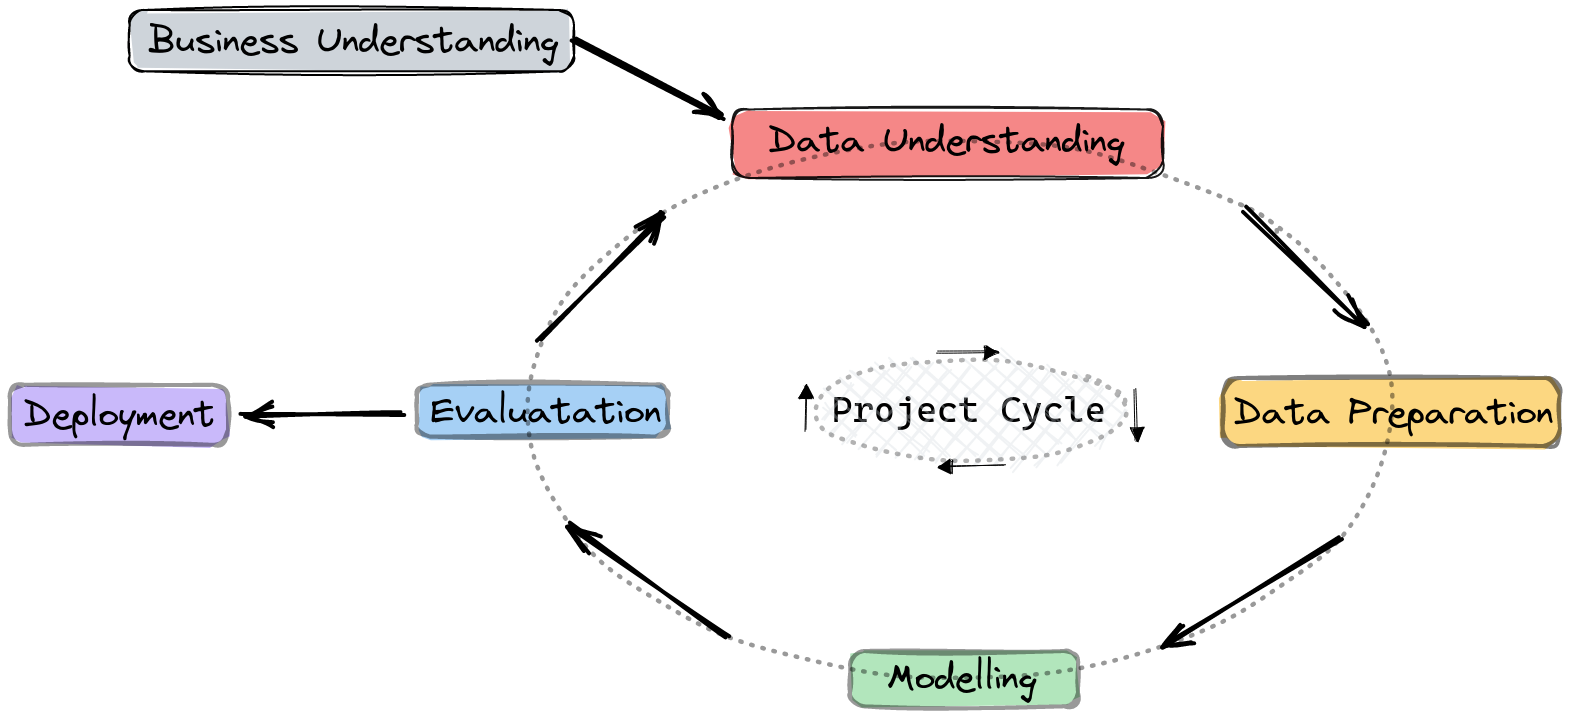

In [1]:
from IPython.display import Image
Image(filename='../../img/crisp_dm.png') # load CRISP-DS image

<h1 style="color:OrangeRed; text-align:center;"> BUSINESS PROBLEM </h1>

<h1>What is the company?</h1>

Arapyaú

<h1>What is its business model?</h1>

Arapyaú is a private, non-profit institution, founded in 2008 with the purpose of promoting dialogue and networking for the collective and permanent construction of solutions based on sustainability. Through the articulation and mobilization of different actors, we seek a sustainable development model in two main territories, the Amazon and southern Bahia, two biodiversity powerhouses.


<h1>What is the business problem the company is facing?</h1>

Arapyaú wants to promote the sustainable economic development of municipalities in Legal Amazon in three main pillars: environmental, economic and social. In order to achieve this goal, Arapyaú launched a challenge, in partnership with BCG Gamma, to generate recommendations based on available public data in order to achieve this goal not only in an innovative but also more efficient way.


<h1 style="color:OrangeRed; text-align:center;"> PROBLEM UNDERSTANGING </h1>

<h1>What is the business solution that this project has to deliver?</h1>

Based on available public data, <b>generate</b> recommendations with focus on <b>non-trivial insights</b> and <b>actionable recommendations</b> to support <b>sustainable economic development</b> of municipalities in the <b>Legal Amazon</b>.

<br>
<br>
References:

https://arapyau.org.br/en/home/


<h1 style="color:OrangeRed; text-align:center;"> BUSINESS ASSUMPTIONS FOR THIS CYCLE </h1>

<ul>
    <br>
    <li><i>If there was no data about fire warnings in some city, it means that there were no forest fire in that city.</i></li>
    <br>
</ul>

<h1 style="color:OrangeRed; text-align:center;"> SOLUTION STRATEGY </h1>

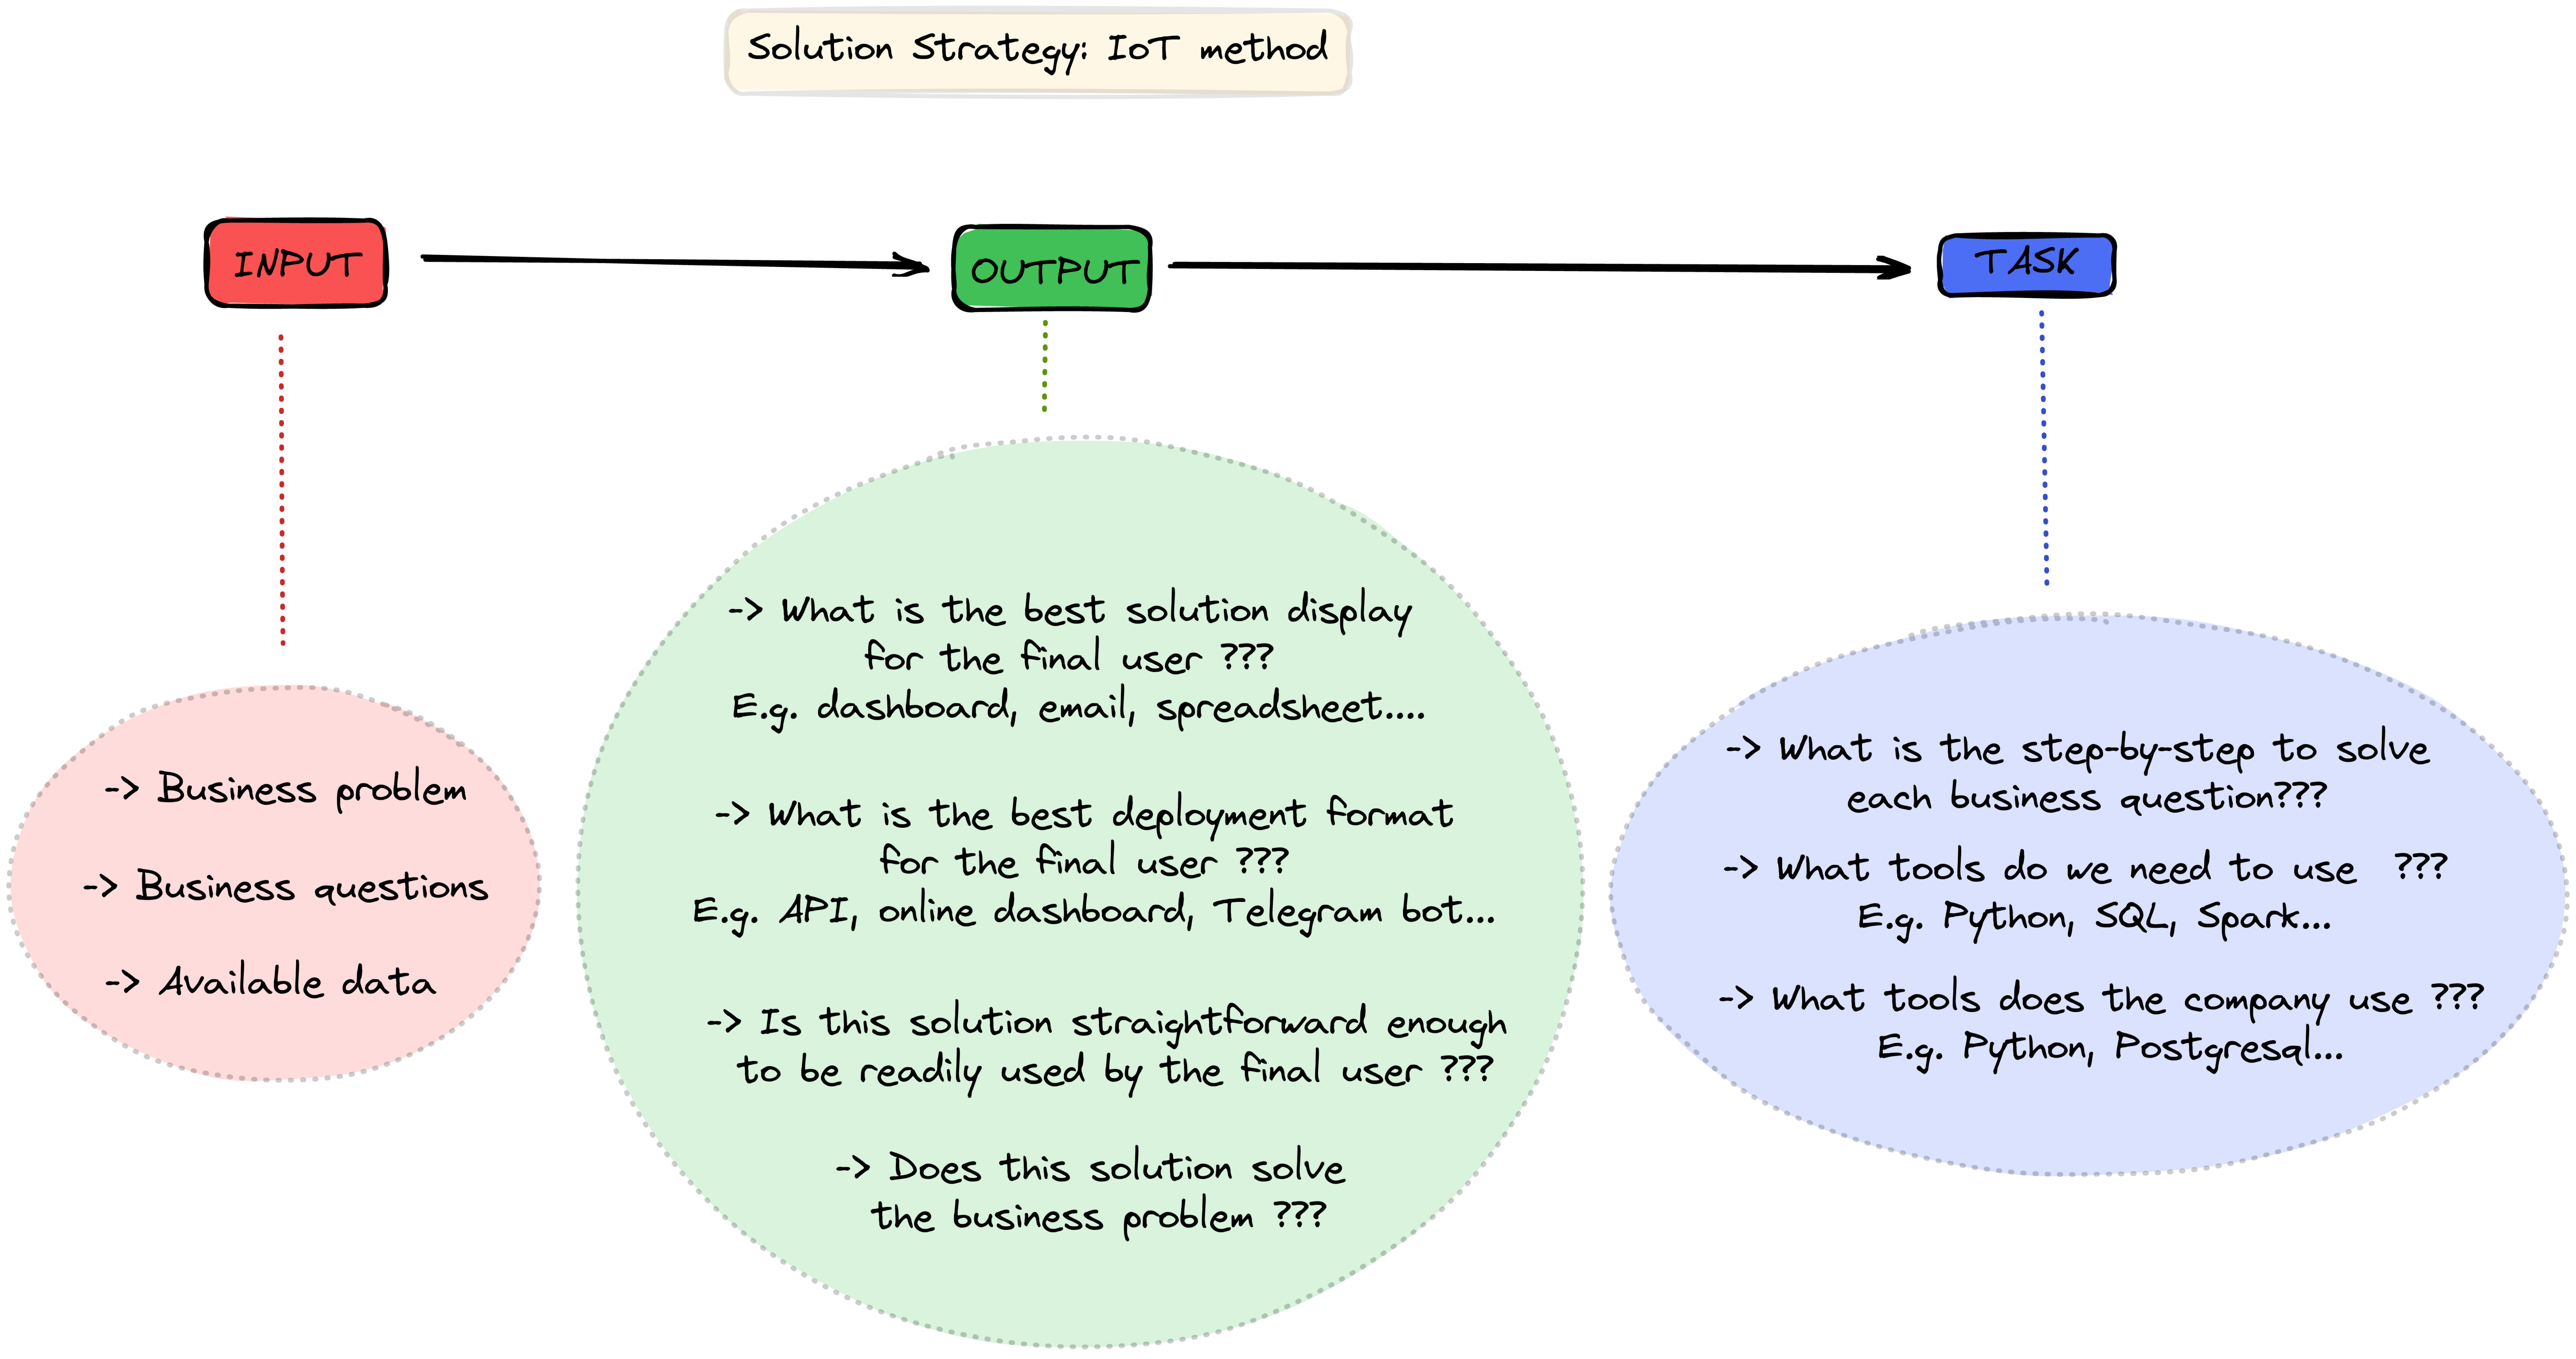

In [2]:
Image("../../img/IoT_method.png") # load IoT method image

We split the topic into four (number of members in the group) so as to work in parallel. This notebook concerns:

> **What regions have the highest social and economic return when recovering or reforesting deforested areas?**

<h1>INPUT</h1>

- **Business problem**: generate recommendations with focus on non-trivial insights and actionable recommendations to support sustainable economic development of municipalities in the Legal Amazon.

- **Business questions**: What regions have the highest social and economic return when recovering or reforesting deforested areas?

- **Available data**: public data with lots of csvs and xls files


<br>
<h1>OUTPUT</h1>

- Presentation with:
    - non-trivial insights and recommendations
    
- ML model (only if relevant to final purpose)

<br>
<h1>TASKs</h1>

- What regions have the highest social and economic return when recovering or reforesting deforested areas?:

    - 1 - Understand what is the main goal
    - 2 - Define the scope of the solution (for this project cycle)
    - 3 - Define subjective terms in a objective (measurable) manner
    - 4 - Understand the data available (at a high level)
    - 5 - Load the data and merge required tables
    - 6 - Clean and prepare the data for analysis
    - 7 - Define hypotheses that will be tested on the present project cycle
    - 8 - Search for rows with misleading data (in regard to business understanding)
    - 9 - Explore the data to get insights
    - 10 - Check if it makes sense to create ML model (if so, do the modelling steps)
    - 11 - Prepare the storytelling in regard to what is required for the final product

<h1 style="color:OrangeRed; text-align:center;"> HYPOTHESIS MIND MAP </h1>

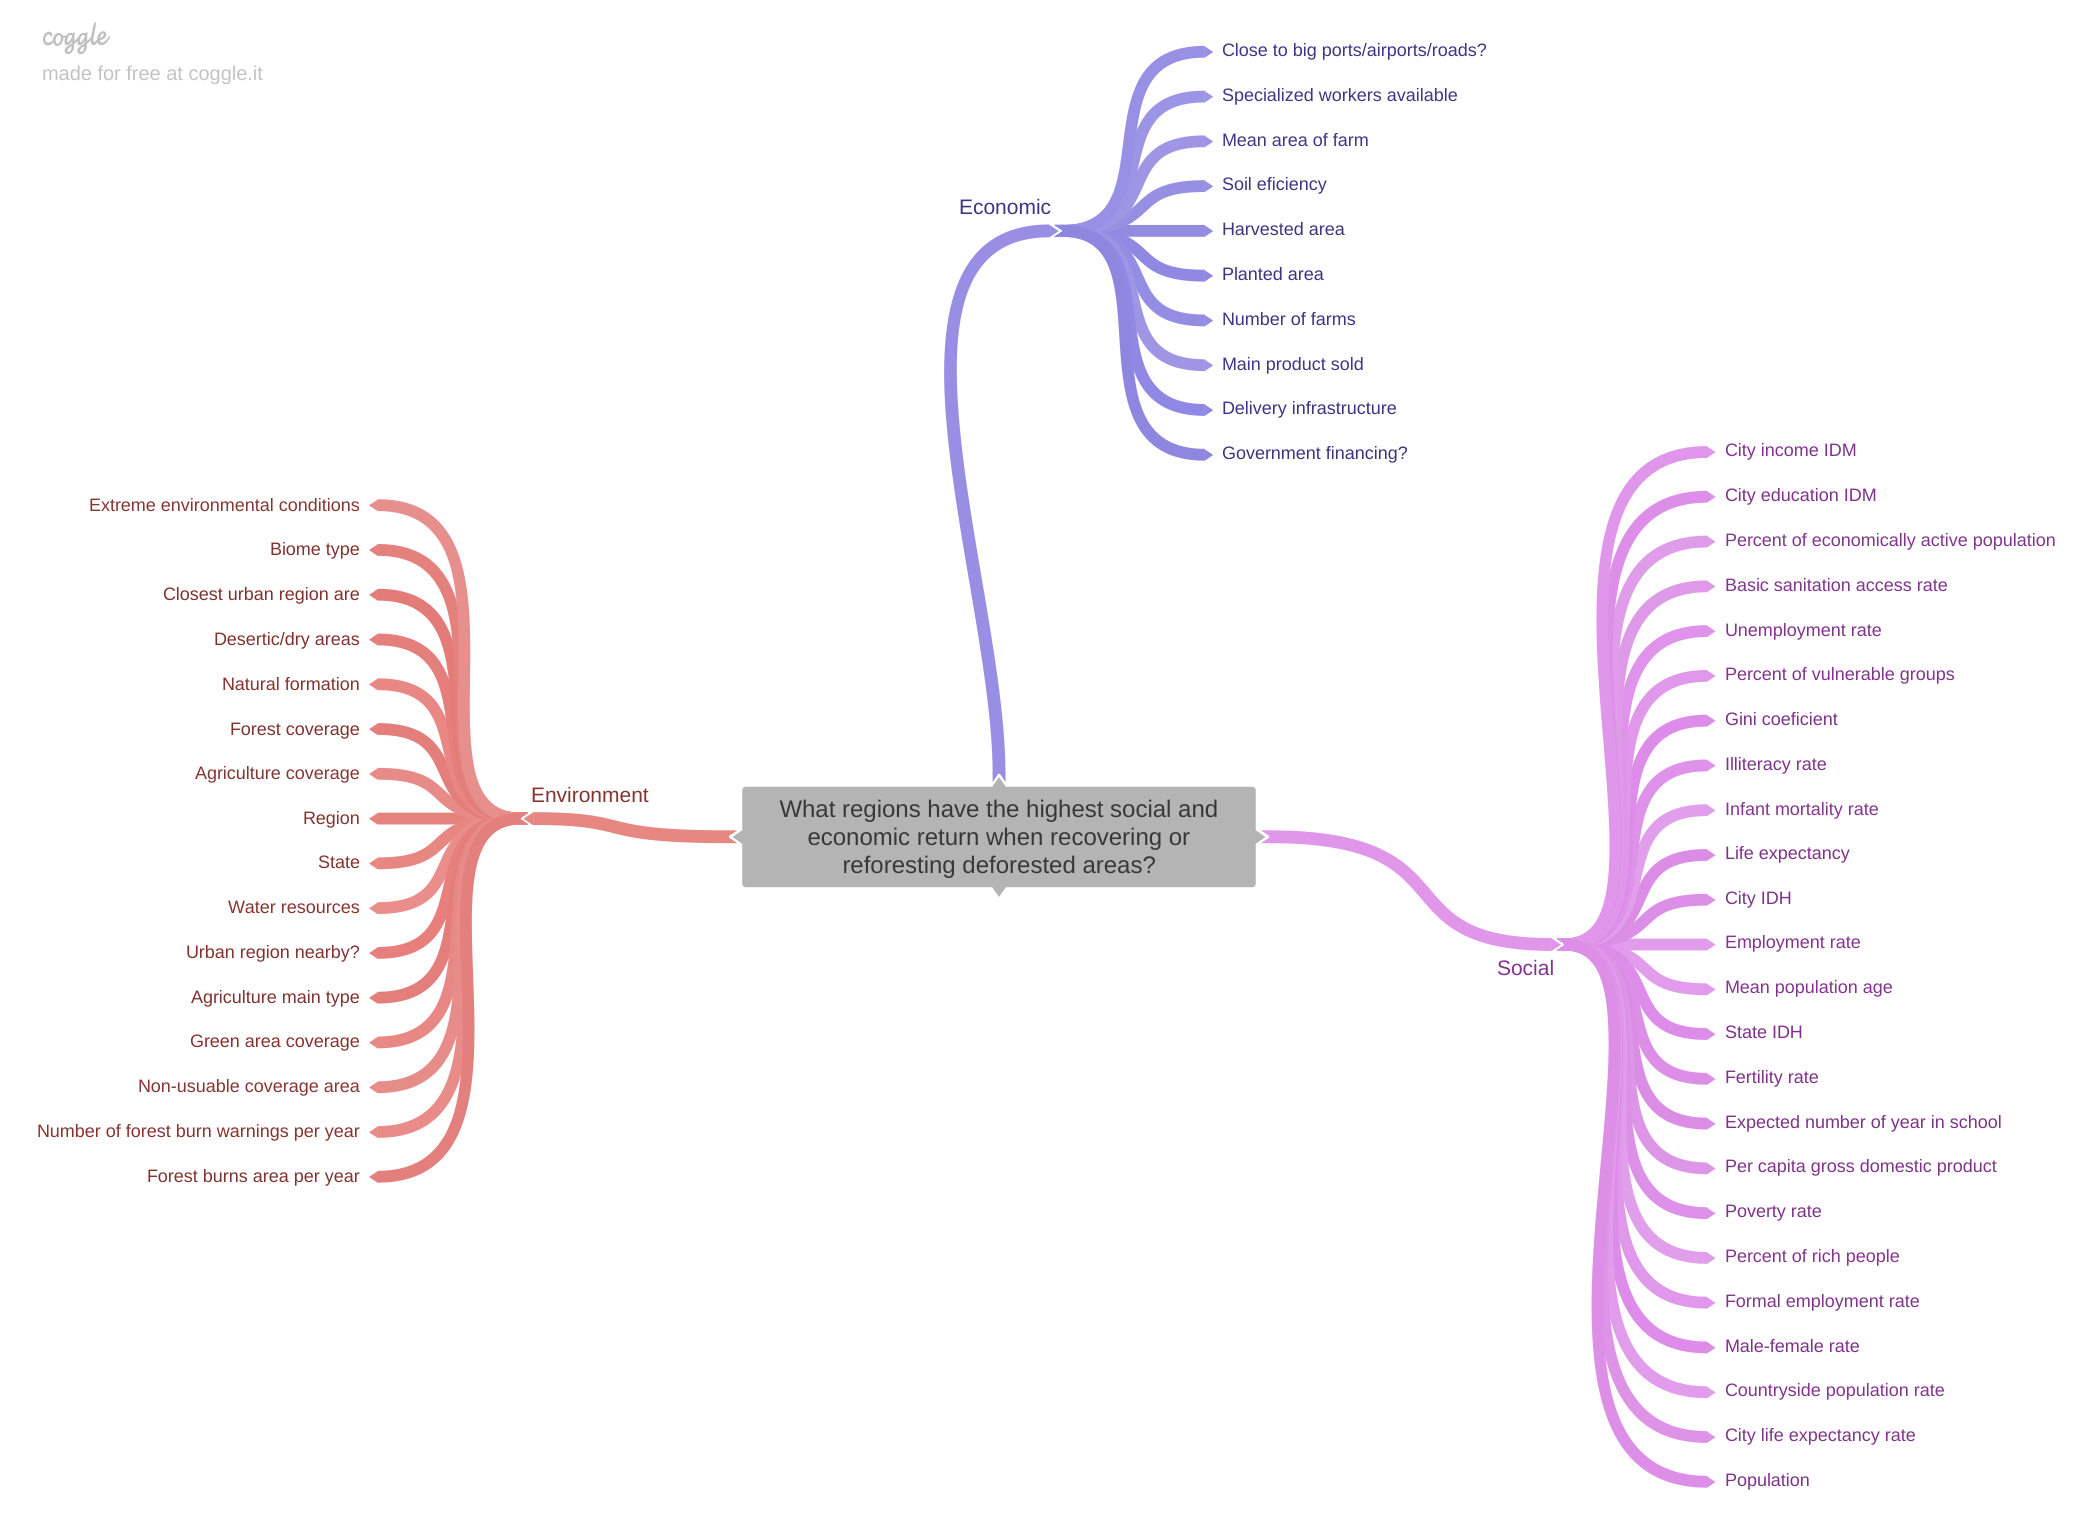

In [3]:
Image("../../img/mind_map.png") # load hypothesis mind map image

The above image is the product of **a brainstorm that took into consideration factors that could indicate what regions have the highest social and economic return when recovering or reforesting deforested areas**. This mind map is a great help when trying to **raise hypotheses** that could **lead to insights**. It is also helpful to **guide feature engineering** (create new relevant features) and when there is a need to **look for more data elsewhere**.

---

---

---

<h1 style="color:RoyalBlue; text-align:center;"> CODE </h1>

# 1 - IMPORTS

## 1.1 - Libraries

*Load required libraries for the project*

In [4]:
# data manipulation
import numpy  as np
import pandas as pd

# string manipulation
import unidecode

# plot
import seaborn           as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# save and load files
import pickle

# project library
from bcg_challenge.initial_config   import initial_settings
from bcg_challenge.data_extraction  import downcast_dataframe
from bcg_challenge.data_description import check_dataframe, check_na_unique_dtypes, summary_statistics
from bcg_challenge.eda              import create_cramer_v_dataframe, numerical_plot, categorical_plot
from bcg_challenge.eda              import plot_spearman_heatmap, plot_cramer_v_heatmap
from bcg_challenge.eda              import correlation_tests
from bcg_challenge.data_preparation import discretize_into_quantile_labales

## 1.2 - Functions

*Define functions that will be used on the project*




NOTE: Most functions made for this project are inside the project library. That is, **a package called "bcg_challenge" was created to hold all functions that will be needed for this project**.

For further details, please check the modules inside "bcg_challenge" package [in other words, check .py files inside bcg_challenge folder]


In [5]:
# example of function created for this project
help(downcast_dataframe)

Help on function downcast_dataframe in module bcg_challenge.data_extraction:

downcast_dataframe(df, verbose=True)
    Try to downcast numeric columns of the dataframe so as to use less memory.
    
    Args
        df: a pd.DataFrame object
        verbose: a boolean to check if user wants to see downcast report
    
    Return
        dataframe: a pd.DataFrame object with downcasted column if it was possible; 
        otherwise, it will just return the original dataframe



## 1.3 - Setup

*Set some configurations for the whole project*

In [6]:
# don't cache libraries (especially a3data_case library)
%load_ext autoreload
%autoreload 2

In [7]:
# initial setup of dataframes and plots
initial_settings()

## 1.4 - Constants

*Define constants that will be used throughout the project*

In [8]:
# define states of legal amazon
LEGAL_AMAZON_STATES = ["ma", "pa", "ap", "to", "ro", "ac", "am", "rr", "mt"]

In [9]:
# open file with context manager
with open("../../data/processed/codigo_ibge_legal_amazon_cities", "rb") as file:
    # load the codigo_ibge for the cities in Legal Amazon
    CODIGO_IBGE_LEGAL_AMAZON_CITIES = pickle.load(file)
    
# check codes
display(CODIGO_IBGE_LEGAL_AMAZON_CITIES[:10])

# print number of cities
print(f"There are {len(CODIGO_IBGE_LEGAL_AMAZON_CITIES)} cities in Legal Amazon.")

array([2103158, 2103174, 2103208, 2103257, 2103307, 2103406, 2103505,
       2103554, 2103604, 2103703])

There are 808 cities in Legal Amazon.


# 2 - DATA EXTRACTION

## 2.1 - Files Description

*Describe available data in regard to database information*

Registros
Administrativos
- Indic. de desenvolvimento humano dos municípios
- Princiapais dados: Saúde, Economia, Educação, Infraestrutura
- Granularidade: Município
- Anual (2012-2017)

MUNIC
- Informações sobre dinâmica e estrutura do município
- Princiapais dados: Perfil dos municípios em múltiplas áreas (saúde, cultura, educação, ...): Políticas e projetos existentes; Recursos; Capacitação de pessoal
- Granularidade: Município
- Anual (2015-2020)

Censo
- Indicadores do censo no nível município
- Princiapais dados: Indicadores para múltiplas áreas averiguadas no censo: Saúde; Educação; Economia
- Granularidade: Município
- Pontual (1999, 2000, 2010)

Exportações
- Informações sobre exportações brasileiras
- Princiapais dados: Produto exportado; Município de origem; País de destino; Valor de remessa; Peso exportado
- Granularidade: Município
- Mensal (2010-2020)

Produção Agrícola Municipal
- Índice de produção agrícola de diversos produtos
- Princiapais dados: Área colhida; Área plantada; Rendimento médio
- Granularidade: Município
- Anual (2003-2019)

Cadastro Ambiental Rural
- Registro de imóveis rurais
- Princiapais dados: Número de imóveis; Área total dos imóveis
- Granularidade: Município
- Pontual (2021)

Mapbiomas - Alertas
- Alertas enviados p/ MapBiomas de desmatamento
- Princiapais dados: Cidade do alerta; Tipo de bioma do local; Área do desmatamento; Alerta se presença de unidade de conservação, terra indígena ou quilombo
- Granularidade: Alerta
- Anual (2019-2020)

Mapbiomas - Transição
- Informações sobre transição de cobertura vegetal
- Princiapais dados: Perfil de transição entre segmentos de cobertura
- Granularidade: Município; Bioma de origem; Bioma de transição
- Anual (1985-2020)

Mapbiomas - Cobertura
- Informações sobre áreas de cobertura vegetal
- Princiapais dados: Área de cobertura de cada segmento de cobertura, por ano; Agregação e tratamento de Mapbiomas - Transição
- Granularidade: Município
- Anual (1985-2020)

De-para Municípios
- De-para entre código do município e nome / UF
- Princiapais dados: Código município; Nome município; UF
- Granularidade: Município
- Pontual

"Legal Amazon" is composed of 9 states: Roraima, Amapá, Amazonas, Pará, Maranhão, Acre, Rondônia, Tocantins and Mato Groso. So we will used data only from these states.

## 2.2 - Data Loading

*Load data from required files*

### 2.2.1 - Informações Básicas da Cidade

In [10]:
# # load data
# df_cities = pd.read_csv("../../data/raw/UF_MUN.csv", encoding = "iso-8859-1", 
#                         low_memory = False, delimiter = ";")

# # change string columns to lower case -> avoid errors
# df_cities["NO_MUN_MIN"] = df_cities["NO_MUN_MIN"].str.lower()
# df_cities["SG_UF"] = df_cities["SG_UF"].str.lower()

# # remove accent from city names to avoid errors in case of comparisions among dataframes
# df_cities["NO_MUN_MIN"] = df_cities["NO_MUN_MIN"].apply( lambda x:unidecode.unidecode(x))

# # check information
# display(df_cities.head(5), df_cities["SG_UF"].unique())

In [11]:
# # get only relevant states
# df_cities = df_cities[ df_cities["SG_UF"].isin(LEGAL_AMAZON_STATES) ] 

# # get only relevant columns
# df_cities = df_cities[ ["CO_MUN_IBGE_7", "NO_MUN_MIN", "SG_UF"] ] 

# # rename columns -> easier to interpret
# df_cities.rename(columns = {"CO_MUN_IBGE_7":"codigo_ibge", 
#                              "NO_MUN_MIN": "nome_munic", 
#                              "SG_UF": "estado"},
#                  inplace = True)

# # check dataframe
# display(df_cities.sample(3), df_cities["estado"].unique())

# # save pre-processed data
# df_cities.to_csv("../../data/processed/uf_mun.csv", sep = ";", index = False)

In [12]:
# # open file with context manager
# with open("../../data/processed/codigo_ibge_legal_amazon_cities", "wb") as file:
#     # save the codigo_ibge for the cities in Legal Amazon
#     pickle.dump(obj = df_cities["codigo_ibge"].unique(), 
#                 file = file, 
#                 protocol = pickle.HIGHEST_PROTOCOL)

In [13]:
# load data
df_cities = pd.read_csv("../../data/processed/uf_mun.csv", encoding = "utf-8", #"iso-8859-1",  
                        low_memory = False, delimiter = ";")

# check dataframe
df_cities.sample(5)

codigo_ibge          nome_munic estado
332      1501956  cachoeira do piria     pa
622      1304237           tonantins     am
149      1702158            araguana     to
732      5105903              nobres     mt
122      1600105               amapa     ap

### 2.2.2 - Cadastro Ambiental Rural

In [14]:
# # load data
# df_car = pd.read_csv("../../data/raw/Cadastro Ambiental Rural (CAR)/car_agregado_municipio.csv", 
#                      encoding = "utf-8", low_memory = False, delimiter = ";")

# # change string columns to lower case -> avoid errors
# df_car["sigla"] = df_car["sigla"].str.lower()
# df_car["nome_munic"] = df_car["nome_munic"].str.lower()

# # check information
# display(df_car.head(3), df_car["sigla"].unique())

In [15]:
# # get only relevant states
# df_car = df_car[ df_car["sigla"].isin(LEGAL_AMAZON_STATES) ] 

# # rename columns -> easier to interpret
# df_car.rename(columns = {"sigla":"estado", 
#                          "geocodig_m":"codigo_ibge", 
#                          "imoveis_car":"num_imoveis_rurais_2021",
#                          "area_car": "area_imoveis_rurais_hectar_2021"},
#                  inplace = True)

# # check dataframe
# display(df_car.sample(3), df_car["estado"].unique())

# # save pre-processed data
# df_car.to_csv("../../data/processed/mun_cadastro_rural_2021.csv", sep = ";", index = False)

In [16]:
# load data
df_cadastro_amb_rural = pd.read_csv("../../data/processed/mun_cadastro_rural_2021.csv", 
                                    encoding = "utf-8", low_memory = False, delimiter = ";")

# check dataframe
df_cadastro_amb_rural.sample(5)

estado      nome_munic  codigo_ibge  num_imoveis_rurais_2021  \
683     to         arraias      1702406                     1001   
45      am       fonte boa      1301605                      365   
464     pa        almeirim      1500503                     3779   
144     ma          cajari      2102507                       79   
363     mt  glória d'oeste      5103957                      410   

     area_imoveis_rurais_hectar_2021  
683                      311,054.717  
45                     1,499,433.107  
464                    1,635,693.095  
144                       23,843.812  
363                       78,248.549

### 2.2.3 - Registros Administrativos

In [17]:
# # load data
# df_admin = pd.read_excel("../../data/raw/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx", 
#                        sheet_name = "MUNICÍPIO")

# # change string columns to lower case -> avoid errors
# df_admin["NOME"] = df_admin["NOME"].str.lower()

# # check information
# df_admin.sample(3)

In [18]:
# # check available years
# display(df_admin["ANO"].unique())

# # get only the latest availabe year data
# df_admin = df_admin[ df_admin["ANO"] == 2017 ] 

# # get only relevant cities
# df_admin = df_admin[ df_admin["IBGE7"].isin(CODIGO_IBGE_LEGAL_AMAZON_CITIES) ] 

# # sanity check
# assert len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) == len(df_admin), "Attention: some cities may be missing!!!"

# # rename columns -> easier to interpret
# df_admin.rename(columns = {"IBGE7":"codigo_ibge"},
#                 inplace = True)
# # add tracking information for coded features
# df_admin.columns = [col.lower() + "_admin_2017" if idx > 3 else col for idx, col in enumerate(df_admin.columns)]

# # check dataframe
# display(df_admin.sample(3))

# # save pre-processed data
# df_admin.to_csv("../../data/processed/registro_admin_mun_2017.csv", sep = ";", index = False)

In [19]:
# After exploring available datasets information and descriptions, 
# define columns that will be first explored of the given dataframe 
col_admin_first_iteration = [
'ANO', 'codigo_ibge', 'NOME', 
'ttreva_ef_total_admin_2017', 'ttreva_em_total_admin_2017', 
'ideb_ai_admin_2017', 'ideb_af_admin_2017', 
'txmoinf_admin_2017', 'txmohomi_admin_2017', 'txmodcnt_admin_2017', 
'txmoatra_admin_2017', 'txmosui_admin_2017', 'txmoagr_admin_2017', 
'pinterdrsai_admin_2017', 
'ren_pibpc_d_admin_2017', 'ren_rensf_d_admin_2017', 
'pdefagua_admin_2017', 'pdefesgoto_admin_2017', 'pdeflixo_admin_2017', 
'pind_pos_admin_2017', 'pmpob_pos_admin_2017', 'ppob_pos_admin_2017', 'pbf_admin_2017',
'snis_pagua_admin_2017', 'snis_pesgoto_admin_2017', 'snis_pesgtra_admin_2017', 
'snis_pcolsel_admin_2017', 'snis_cdi_admin_2017', 
'pfocos_admin_2017', 'pflora_admin_2017', 'pop_tot_admin_2017']

In [20]:
# load data
df_admin = pd.read_csv("../../data/processed/registro_admin_mun_2017.csv", 
                       encoding = "utf-8", low_memory = False, delimiter = ";")

# filter columns
df_admin = df_admin[ col_admin_first_iteration ]

# check dataframe
df_admin.sample(5)

ANO  codigo_ibge                      NOME  ttreva_ef_total_admin_2017  \
624  2017      2110708  são domingos do maranhão                         NaN   
586  2017      2108108               paulo ramos                         NaN   
17   2017      1100254         presidente médici                         NaN   
405  2017      1716604                     peixe                         NaN   
174  2017      1501709                  bragança                         NaN   

     ttreva_em_total_admin_2017  ideb_ai_admin_2017  ideb_af_admin_2017  \
624                         NaN               4.600               3.700   
586                         NaN               3.800               2.900   
17                          NaN               6.300               5.400   
405                         NaN               5.000               4.600   
174                         NaN               4.100               3.200   

     txmoinf_admin_2017  txmohomi_admin_2017  txmodcnt_admin_2017  ...  \
624               9.360               53.427              287.911  ...   
586               9.804               14.523              213.003  ...   
17               38.062                9.040              406.798  ...   
405               7.937               25.882              207.057  ...   
174              12.387               35.431              239.967  ...   

     ppob_pos_admin_2017  pbf_admin_2017  snis_pagua_admin_2017  \
624               94.230          84.730                 64.100   
586               96.590          89.580                 42.000   
17                74.790          61.270                 87.460   
405               73.080          55.960                100.000   
174               92.110          81.560                 23.200   

     snis_pesgoto_admin_2017  snis_pesgtra_admin_2017  \
624                      NaN                      NaN   
586                      NaN                      NaN   
17                       NaN                      NaN   
405                   22.860                  100.000   
174                      NaN                      NaN   

     snis_pcolsel_admin_2017  snis_cdi_admin_2017  pfocos_admin_2017  \
624                      NaN                  NaN              0.850   
586                      NaN                  NaN              0.330   
17                       NaN                  NaN              0.040   
405                      NaN              100.000              0.590   
174                      NaN               75.330              0.320   

     pflora_admin_2017  pop_tot_admin_2017  
624             47.300               33691  
586             51.510               20657  
17              14.170               22124  
405             51.980               11591  
174             47.420              124184  

[5 rows x 31 columns]

In [21]:
# load data
df_admin_legenda = pd.read_excel("../../data/raw/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx", 
                       sheet_name = "LEGENDA")

# show admin legend
df_admin_legenda

SIGLA  \
0          PMATPUB_EF   
1          PMATPUB_EM   
2          PMATPRI_EF   
3          PMATPRI_EM   
4       DIST_EF_TOTAL   
..                ...   
73    PFEM_GOVERNADOR   
74  PFEM_DEP_ESTADUAL   
75   PFEM_DEP_FEDERAL   
76       PFEM_SENADOR   
77            POP_TOT   

                                                 NOME DO INDICADOR  \
0   Percentual de matrículas da rede pública no ensino fundamental   
1         Percentual de matrículas da rede pública no ensino médio   
2   Percentual de matrículas da rede privada no ensino fundamental   
3         Percentual de matrículas da rede privada no ensino médio   
4                     Taxa de Distorção Idade-Série no fundamental   
..                                                             ...   
73                    Percentual de governadores dos sexo feminino   
74             Percentual de deputados estaduais dos sexo feminino   
75              Percentual de deputados federais dos sexo feminino   
76                        Percentual de senadores do sexo feminino   
77                                                 População total   

                                                                                                                                                                                                                                                         DEFINIÇÃO  
0                                                                                                                                        Participação percentual das matrículas na rede pública do ensino fundamental no total de matrículas no ensino fundamental  
1                                                                                                                                                    Participação percentual das matrículas na rede pública do ensino médio no total de matrículas no ensino médio  
2                                                                                                                                        Participação percentual das matrículas na rede privada do ensino fundamental no total de matrículas no ensino fundamental  
3                                                                                                                                                    Participação percentual das matrículas na rede privada do ensino médio no total de matrículas no ensino médio  
4                                                                                        Participação percentual dos alunos que frequentam o ensino fundamental com atraso idade-série de dois anos ou mais no total de alunos que frequentam o ensino fundamental  
..                                                                                                                                                                                                                                                             ...  
73                                                                                                                                                              Participação percentual entre o número de governadores do sexo feminino e o total de governadores   
74                                                                                                                                                Participação percentual entre o número de deputados estaduais do sexo feminino e o total de deputados estaduais   
75                                                                                                                                                  Participação percentual entre o número de deputados federais do sexo feminino e o total de deputados federais   
76                                                                                                                                                                    Participação percentual entre o número de senadores do sexo feminino e o total de senadores   
77 

### 2.2.4 - Produção Agrícola Municipal

In [22]:
# # load data
# df_pam = pd.read_excel("../../data/raw/Producao Agricola Municipal (PAM)/PAM.xlsx", 
#                          sheet_name = "Dados")

# # check information
# df_pam.sample(3)

In [23]:
# # check available years
# display(df_pam["ano"].unique())

# # get only the latest availabe year data
# df_pam = df_pam[ df_pam["ano"] == 2019 ] 

# # get only relevant cities
# df_pam = df_pam[ df_pam["geo_id"].isin(CODIGO_IBGE_LEGAL_AMAZON_CITIES) ] 

# # sanity check
# if len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) != len(df_admin):
#     # print warning to check data
#     print(f"Attention: {abs(len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) - len(df_admin))} cities may be missing!!!")

# #########
# # The problem here is that city with code 1504422 only have data for year 2006
# # and city with code 1504422 only have data for year 2017
# #########

# # rename columns -> easier to interpret
# df_pam.rename(columns = {"geo_id":"codigo_ibge",
#                          "area_colhida_v0": "area_colhida_2019",
#                          "area_plantada_dest_colheita_v0": "area_plantada_dest_colheita_2019", 
#                          "valor_v0": "valor_rendimento_medio_pam_2019"},
#               inplace = True)

# # get only relevant columns
# df_pam = df_pam[ ["codigo_ibge", "area_colhida_2019", "area_plantada_dest_colheita_2019", "valor_rendimento_medio_pam_2019"] ] 

# # check dataframe
# display(df_pam.sample(3))

# # save pre-processed data
# df_pam.to_csv("../../data/processed/pam_2019.csv", sep = ";", index = False)

In [24]:
# load data
df_pam = pd.read_csv("../../data/processed/pam_2019.csv", 
                       encoding = "utf-8", low_memory = False, delimiter = ";")

# check dataframe
df_pam.sample(5)

codigo_ibge  area_colhida_2019  area_plantada_dest_colheita_2019  \
223      1502707          6,062.000                         6,062.000   
2        1100031         46,775.000                        46,947.000   
472      2105500            345.000                           345.000   
627      2102077          1,375.000                         1,375.000   
319      1702158             21.000                            21.000   

     valor_rendimento_medio_pam_2019  
223                       32,032.000  
2                        141,106.000  
472                          907.000  
627                        1,285.000  
319                           31.000

### 2.2.5 - Mapa Biomas Alertas

In [25]:
# # load data
# df_mapa_biomas_alertas = pd.read_excel("../../data/raw/Mapbiomas - alertas/DB_ALL_ALERTS_RAD2020_SITE.xlsx", 
#                                        sheet_name = "BD_ALERTAS_VAL_CAR")

# # check information
# df_mapa_biomas_alertas.sample(3)

In [26]:
# # check available years
# display(df_mapa_biomas_alertas["detected_year"].unique())

# # get only the latest availabe year data
# df_mapa_biomas_alertas = df_mapa_biomas_alertas[ df_mapa_biomas_alertas["detected_year"] == 2020 ] 

# # define code for states in Legal Amazon
# # according to information in xls spreadsheet
# state_legal_amazon = [18411, 18408, 18412, 18410, 18349, 18397, 18368, 18367, 18386]
                                           
# # get only relevant states
# df_mapa_biomas_alertas = df_mapa_biomas_alertas[ df_mapa_biomas_alertas["state_id"].isin(state_legal_amazon) ] 

# # add tracking information for coded features
# df_mapa_biomas_alertas.columns = [col.lower() + "_alertas_2020" for col in df_mapa_biomas_alertas.columns]

# # check dataframe
# display(df_mapa_biomas_alertas.sample(3), df_mapa_biomas_alertas["state_alertas_2020"].unique())

# # save pre-processed data
# df_mapa_biomas_alertas.to_csv("../../data/processed/mapa_biomas_alertas_2020.csv", sep = ";", index = False)

In [27]:
# # group alertas per city and sum the alerts quantities
# df_mapa_biomas_alertas_grouped = df_mapa_biomas_alertas.groupby(by = "city_alertas_2020", as_index = False).sum()

# # add tracking information for coded features
# df_mapa_biomas_alertas_grouped.columns = [col.lower() + "_sum" if idx > 0 else col for idx, col in enumerate(df_mapa_biomas_alertas_grouped.columns)]

# # remove accent from city names to avoid errors in case of comparions
# df_mapa_biomas_alertas_grouped["city_alertas_2020"] = df_mapa_biomas_alertas_grouped["city_alertas_2020"].apply( lambda x:unidecode.unidecode( x.lower() ) )

# # check dataframe
# display(df_mapa_biomas_alertas_grouped.head())

# # save pre-processed data
# df_mapa_biomas_alertas_grouped.to_csv("../../data/processed/mapa_biomas_alertas_2020_grouped.csv", sep = ";", index = False)

In [28]:
# After exploring available datasets information and descriptions, 
# define columns that will be first explored of the given dataframe 
col_biomas_alertas_first_iteration = [
'city_alertas_2020', 
'alert_total_area_ha_alertas_2020_sum', 
'alert_legal_reserve_area_ha_alertas_2020_sum',
'alert_river_source_count_alertas_2020_sum',
'alert_car_uc_area_ha_alertas_2020_sum',
'alert_car_indigenous_area_ha_alertas_2020_sum',
'alert_car_quilombo_area_alertas_2020_sum',
'alert_car_settlements_area_ha_alertas_2020_sum',
]

In [29]:
# load data
df_mapa_biomas_alertas = pd.read_csv("../../data/processed/mapa_biomas_alertas_2020.csv", 
                                     encoding = "utf-8", low_memory = False, delimiter = ";")

# load data
df_mapa_biomas_alertas_grouped = pd.read_csv("../../data/processed/mapa_biomas_alertas_2020_grouped.csv", 
                                             encoding = "utf-8", low_memory = False, delimiter = ";")

# filter columns
df_mapa_biomas_alertas_grouped = df_mapa_biomas_alertas_grouped[ col_biomas_alertas_first_iteration ]

# check dataframe
display(df_mapa_biomas_alertas.head(), df_mapa_biomas_alertas_grouped.head())

rural_property_id_alertas_2020  \
0                         7738769   
1                         7738797   
2                         6828613   
3                         7738754   
4                         4943385   

                         car_code_alertas_2020  car_area_ha_alertas_2020  \
0  TO-1700251-71F19C6748224E339C724D6EE7E5EFBD                 1,376.118   
1  TO-1700251-2B9DDD0CAC8E4E68B0BBC41A6CE4FBFF                 8,051.516   
2  MT-5106315-FAE9793D08434CBEB83667B507E74349               107,142.061   
3  MT-5106315-E09C56B0352B4DC89E57946FBEB6A88E                   115.787   
4  MT-5103304-75ECF8FF2C3C471385B970EBC32A4543                25,609.593   

   alert_car_area_ha_alertas_2020  alert_total_area_ha_alertas_2020  \
0                           0.034                           373.378   
1                         373.378                           373.378   
2                          19.117                            19.117   
3                          18.819                            19.117   
4                       1,246.913                         1,246.913   

   alert_id_alertas_2020  alert_geometry_id_alertas_2020 source_alertas_2020  \
0                 116327                          206542     {DETER-CERRADO}   
1                 116327                          206542     {DETER-CERRADO}   
2                 116328                          206538     {DETER-CERRADO}   
3                 116328                          206538     {DETER-CERRADO}   
4                 116329                          522358     {DETER-CERRADO}   

   detected_year_alertas_2020 detected_at_alertas_2020  ...  \
0                        2020               2020-04-06  ...   
1                        2020               2020-04-06  ...   
2                        2020               2020-05-02  ...   
3                        2020               2020-05-02  ...   
4                        2020               2020-05-01  ...   

   alert_car_pmfs_area_ha_alertas_2020 alert_car_poa_alertas_2020  \
0                                  NaN                          0   
1                                  NaN                          0   
2                                  NaN                          0   
3                                  NaN                          0   
4                                  NaN                          0   

   alert_car_poa_area_ha_alertas_2020 alert_car_efp_alertas_2020  \
0                                 NaN                          0   
1                                 NaN                          0   
2                                 NaN                          0   
3                                 NaN                          0   
4                                 NaN                          0   

   alert_car_efp_area_ha_alertas_2020 car_embargoed_count_alertas_2020  \
0                                 NaN                                0   
1                                 NaN                                0   
2                                 NaN                                7   
3                                 NaN                                0   
4                                 NaN                                0   

   car_embargoed_area_ha_alertas_2020  alert_car_before_dt_alertas_2020  \
0                                 NaN                        2020-02-16   
1                                 NaN                        2020-02-16   
2                             224.101                        2020-03-19   
3                                 NaN                        2020-03-19   
4                                 NaN                        2019-12-28   

   alert_car_after_dt_alertas_2020  alert_car_days_interval_alertas_2020  
0                       2020-04-28                                72.000  
1                       2020-04-28                                72.000  
2                       2020-04-27                                39.000  
3               

city_alertas_2020  alert_total_area_ha_alertas_2020_sum  \
0        abaetetuba                               263.314   
1   abel figueiredo                               136.109   
2       abreulandia                             7,575.125   
3             acara                             1,577.214   
4          acorizal                                84.484   

   alert_legal_reserve_area_ha_alertas_2020_sum  \
0                                         0.043   
1                                         0.817   
2                                       177.110   
3                                       318.176   
4                                         8.339   

   alert_river_source_count_alertas_2020_sum  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   alert_car_uc_area_ha_alertas_2020_sum  \
0                                  0.000   
1                                  0.000   
2                              1,930.415   
3                                  0.000   
4                                  0.000   

   alert_car_indigenous_area_ha_alertas_2020_sum  \
0                                          0.000   
1                                          0.000   
2                                          0.000   
3                                          0.000   
4                                          0.000   

   alert_car_quilombo_area_alertas_2020_sum  \
0                                   124.755   
1                                     0.000   
2                                     0.000   
3                                     0.000   
4                                     0.000   

   alert_car_settlements_area_ha_alertas_2020_sum  
0                                         117.163  
1                                           0.000  
2                                           1.147  
3                                         171.444  
4                                          17.329

### 2.2.6 - Mapa Biomas Cobertura

In [30]:
# # load data
# df_mapa_biomas_cobertura = pd.read_csv("../../data/raw/Mapbiomas - Cobertura/mapbiomas_cover.csv", 
#                                        encoding = "iso-8859-1", low_memory = False, delimiter = ",")

# # change string columns to lower case -> avoid errors
# df_mapa_biomas_cobertura["municipality"] = df_mapa_biomas_cobertura["municipality"].str.lower()
# df_mapa_biomas_cobertura["state"] = df_mapa_biomas_cobertura["state"].str.lower()

# # check latest year with available data
# display(df_mapa_biomas_cobertura["year"].unique())

# # check information
# display(df_mapa_biomas_cobertura.shape, df_mapa_biomas_cobertura.sample(3))

*Data over time*

In [31]:
# # get the total_area by summing all available areas
# df_mapa_biomas_cobertura["total_area"] = df_mapa_biomas_cobertura[["x3_farming", 
#                                                                    "x4_non_vegetated_area", 
#                                                                    "x1_forest",
#                                                                    "x2_non_forest_natural_formation",
#                                                                    "x5_water",
#                                                                    "non_observed"]].sum(axis=1)

# # check operation
# df_ = df_mapa_biomas_cobertura.groupby(by = ["state", "year"], as_index = False).agg(
#                             sum_farming_area = ("x3_farming", "sum"),
#                             sum_forest_area = ("x1_forest", "sum"),
#                             sum_total_area = ("total_area", "sum"),
#                             sum_total_water = ("x5_water", "sum"),
#                             sum_non_vegetated = ("x4_non_vegetated_area", "sum"),
#                             sum_natural_non_forest = ("x2_non_forest_natural_formation", "sum")
# )

# # check dataframe
# display(df_.columns, df_.sample(5))

# # save pre-processed data
# df_.to_csv("../../data/processed/mapa_biomas_cobertura_state_timeline.csv", sep = ";", index = False)

In [32]:
# load data
df_cobertura_state_timeline = pd.read_csv("../../data/processed/mapa_biomas_cobertura_state_timeline.csv", 
                                          encoding = "utf-8", low_memory = False, delimiter = ";")

# check dataframe
df_cobertura_state_timeline.sample(5)

state  year  sum_farming_area  sum_forest_area  sum_total_area  \
664    rj  2019     2,637,109.655    1,353,040.787   4,374,033.597   
33     ac  2018     1,919,755.790   14,406,512.927  16,395,835.121   
308    go  2013    20,893,098.364   11,037,773.076  34,010,610.523   
743    rr  1993       222,518.826   17,079,872.616  22,319,650.073   
490    pb  1985     2,067,290.467    3,090,706.954   5,646,648.685   

     sum_total_water  sum_non_vegetated  sum_natural_non_forest  
664       88,525.031        265,224.130              30,030.051  
33        48,339.406         15,941.830               5,264.145  
308      390,735.859        222,673.574           1,466,329.649  
743      202,883.282          6,521.995           4,807,772.428  
490       52,033.210         27,148.988             409,455.934

*Latest available data*

In [33]:
# # get data only for the latest year
# df_mapa_biomas_cobertura_2019 = df_mapa_biomas_cobertura[ df_mapa_biomas_cobertura["year"] == 2019]

# # get only relevant states
# df_mapa_biomas_cobertura_2019 = df_mapa_biomas_cobertura_2019[ df_mapa_biomas_cobertura_2019["state"].isin(LEGAL_AMAZON_STATES) ] 

# # rename columns -> easier to interpret
# df_mapa_biomas_cobertura_2019.rename(columns = {"municipality":"nome_munic"}, 
#                                      inplace = True)
# # add tracking information for coded features
# df_mapa_biomas_cobertura_2019.columns = [col.lower() + "_bioma_cobert_2019" if idx > 3 else col for idx, col in enumerate(df_mapa_biomas_cobertura_2019.columns)]

# # sanity check
# if len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) != len(df_mapa_biomas_cobertura_2019):
#     # print warning to check data
#     print(f"Attention: {abs(len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) - len(df_mapa_biomas_cobertura_2019))} cities may be missing!!!")

# # check dataframe
# display(df_mapa_biomas_cobertura_2019.sample(3), df_mapa_biomas_cobertura_2019.shape, df_mapa_biomas_cobertura_2019["state"].unique())

*Earliest available data*

In [34]:
# # get data only for the first year
# df_mapa_biomas_cobertura_1985 = df_mapa_biomas_cobertura[ df_mapa_biomas_cobertura["year"] == 1985]

# # get only relevant states
# df_mapa_biomas_cobertura_1985 = df_mapa_biomas_cobertura_1985[ df_mapa_biomas_cobertura_1985["state"].isin(LEGAL_AMAZON_STATES) ] 

# # rename columns -> easier to interpret
# df_mapa_biomas_cobertura_1985.rename(columns = {"municipality":"nome_munic"}, 
#                                      inplace = True)
# # add tracking information for coded features
# df_mapa_biomas_cobertura_1985.columns = [col.lower() + "_bioma_cobert_1985" if idx > 3 else col for idx, col in enumerate(df_mapa_biomas_cobertura_1985.columns)]

# # sanity check
# if len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) != len(df_mapa_biomas_cobertura_1985):
#     # print warning to check data
#     print(f"Attention: {abs(len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) - len(df_mapa_biomas_cobertura_1985))} cities may be missing!!!")

# # check dataframe
# display(df_mapa_biomas_cobertura_1985.sample(3), df_mapa_biomas_cobertura_1985.shape, df_mapa_biomas_cobertura_1985["state"].unique())

*Merging data*

In [35]:
# # merge dataframes with coverage in 2019 and 1985 
# df_mapa_biomas_cobertura= pd.merge( left = df_mapa_biomas_cobertura_2019, right = df_mapa_biomas_cobertura_1985,
#                                    how = "left", on = "territory_id", suffixes = ["", "_1985"])
# # remove duplicated columns
# df_mapa_biomas_cobertura.drop( columns = ['nome_munic_1985', 'state_1985', 'year_1985'], inplace = True )

# # check dataframe
# display(df_mapa_biomas_cobertura.columns, df_mapa_biomas_cobertura.sample(5))

# # save pre-processed data
# df_mapa_biomas_cobertura.to_csv("../../data/processed/mapa_biomas_cobertura.csv", sep = ";", index = False)

In [36]:
# load data
df_mapa_biomas_cobertura = pd.read_csv("../../data/processed/mapa_biomas_cobertura.csv", 
                                       encoding = "utf-8", low_memory = False, delimiter = ";")

# check dataframe
df_mapa_biomas_cobertura.sample(5)

territory_id                nome_munic state  year  \
150       1400704                  uiramuta    rr  2019   
613       2110005               santa luzia    ma  2019   
226       1504901                     muana    pa  2019   
271       1507409     sao francisco do para    pa  2019   
356       1707108  divinopolis do tocantins    to  2019   

     x3_farming_bioma_cobert_2019  x4_non_vegetated_area_bioma_cobert_2019  \
150                     9,245.034                                   13.100   
613                   336,699.589                                  547.295   
226                     2,786.330                                  124.755   
271                    27,838.318                                  194.489   
356                   105,546.819                                  356.075   

     x1_forest_bioma_cobert_2019  \
150                  206,183.322   
613                  139,622.131   
226                  209,342.637   
271                   19,864.851   
356                  112,148.695   

     x2_non_forest_natural_formation_bioma_cobert_2019  \
150                                        585,546.693   
613                                            720.074   
226                                        114,552.833   
271                                             25.652   
356                                         16,245.227   

     x5_water_bioma_cobert_2019  non_observed_bioma_cobert_2019  \
150                     990.699                          19.960   
613                     427.765                             NaN   
226                  49,526.409                             NaN   
271                      32.623                             NaN   
356                     452.279                             NaN   

     x3_farming_bioma_cobert_1985  x4_non_vegetated_area_bioma_cobert_1985  \
150                     8,511.775                                    0.000   
613                   108,463.152                                  113.713   
226                     6,899.467                                    8.043   
271                    15,432.369                                   47.192   
356                    33,399.365                                  123.750   

     x1_forest_bioma_cobert_1985  \
150                  209,423.249   
613                  367,875.306   
226                  199,628.739   
271                   32,452.686   
356                  182,179.978   

     x2_non_forest_natural_formation_bioma_cobert_1985  \
150                                        582,979.393   
613                                          1,514.926   
226                                        119,816.394   
271                                             14.122   
356                                         19,035.769   

     x5_water_bioma_cobert_1985  non_observed_bioma_cobert_1985  
150                   1,072.095                          12.297  
613                      49.756                             NaN  
226                  49,980.321                             NaN  
271                       9.564                             NaN  
356                      10.233                             NaN

### 2.2.7 - Censo

In [37]:
# # load data
# df_censo = pd.read_excel("../../data/raw/CENSO/Censo_municipal_estadual_nacional.xlsx", 
#                          sheet_name = "MUN 91-00-10")

# # check information
# df_censo.sample(3)

In [38]:
# # check latest year with available data
# display(df_censo["ANO"].unique())

# # get data only for the latest year
# df_censo = df_censo[ df_censo["ANO"] == 2010]

# # get only relevant states
# df_censo = df_censo[ df_censo["Codmun7"].isin(CODIGO_IBGE_LEGAL_AMAZON_CITIES) ] 

# # rename columns -> easier to interpret
# df_censo.rename(columns = {"Codmun7":"codigo_ibge_munic"}, 
#                 inplace = True)
# # add tracking information for coded features
# df_censo.columns = [col.lower() + "_censo_2010" if idx > 4 else col for idx, col in enumerate(df_censo.columns)]

# # remove Codmun6 column
# df_censo.drop( columns = "Codmun6", inplace = True )

# # sanity check
# if len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) != len(df_censo):
#     # print warning to check data
#     print(f"Attention: {abs(len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) - len(df_censo))} cities may be missing!!!")

# # check dataframe
# display(df_censo.sample(3), df_censo.shape, df_censo["UF"].nunique())

# # save pre-processed data
# df_censo.to_csv("../../data/processed/censo_2010.csv", sep = ";", index = False)

In [39]:
# After exploring available datasets information and descriptions, 
# define columns that will be first explored of the given dataframe 

####################################################################################
# commented values are suggestion to explore further in case there is available time
####################################################################################

col_censo_first_iteration = [
'ANO', 'UF', 'codigo_ibge_munic', 'Município', 
'espvida_censo_2010', 'fectot_censo_2010', 
'mort5_censo_2010', 'sobre60_censo_2010', 
't_env_censo_2010', 'e_anosestudo_censo_2010',
't_analf25m_censo_2010', 't_freq4a6_censo_2010', 
't_freq6a17_censo_2010', 'gini_censo_2010', 
'pmpob_censo_2010', 'ppob_censo_2010', 
'r1040_censo_2010', 'r2040_censo_2010',
'rdpc_censo_2010', 'rpob_censo_2010', 
'cpr_censo_2010', 'emp_censo_2010', 
'p_formal_censo_2010', 'p_fund_censo_2010', 
'p_med_censo_2010', 't_ativ18m_censo_2010', 
't_des18m_censo_2010', 'trabcc_censo_2010', 
'trabsc_censo_2010', 't_agua_censo_2010',
't_lixo_censo_2010', 't_luz_censo_2010', 
'agua_esgoto_censo_2010', 'pesorur_censo_2010', 
'pesotot_censo_2010', 'idhm_censo_2010', 
'idhm_e_censo_2010', 'idhm_l_censo_2010',
'idhm_r_censo_2010']

In [40]:
# load data
df_censo = pd.read_csv("../../data/processed/censo_2010.csv", 
                       encoding = "utf-8", low_memory = False, delimiter = ";")

# filter columns
df_censo = df_censo[ col_censo_first_iteration ]

# check dataframe
df_censo.sample(5)

ANO  UF  codigo_ibge_munic                   Município  \
488  2010  21            2102309                BURITI BRAVO   
551  2010  21            2105948          LAGO DOS RODRIGUES   
262  2010  15            1506708         SANTANA DO ARAGUAIA   
352  2010  17            1706258         CRIXÁS DO TOCANTINS   
614  2010  21            2110104  SANTA QUITÉRIA DO MARANHÃO   

     espvida_censo_2010  fectot_censo_2010  mort5_censo_2010  \
488              70.100              2.630            31.650   
551              69.220              2.490            34.770   
262              71.430              2.640            24.510   
352              72.860              2.240            20.230   
614              70.610              3.380            29.900   

     sobre60_censo_2010  t_env_censo_2010  e_anosestudo_censo_2010  ...  \
488              81.950             7.360                    9.040  ...   
551              80.460             8.280                   10.190  ...   
262              84.260             2.880                    8.190  ...   
352              86.550             6.590                    9.460  ...   
614              82.800             6.050                    8.340  ...   

     t_agua_censo_2010  t_lixo_censo_2010  t_luz_censo_2010  \
488             80.140             31.310            95.790   
551             94.570             88.280            98.960   
262             89.450             95.800            85.670   
352             98.980             99.800            89.330   
614             74.430             47.590            94.460   

     agua_esgoto_censo_2010  pesorur_censo_2010  pesotot_censo_2010  \
488                  19.780                5885               22899   
551                  25.930                2945                7794   
262                  30.630               26490               56153   
352                   8.870                 692                1564   
614                  26.860               15050               29191   

     idhm_censo_2010  idhm_e_censo_2010  idhm_l_censo_2010  idhm_r_censo_2010  
488            0.590              0.506              0.752              0.539  
551            0.602              0.534              0.737              0.555  
262            0.602              0.478              0.774              0.591  
352            0.644              0.555              0.798              0.603  
614            0.555              0.458              0.760              0.490  

[5 rows x 39 columns]

### 2.2.8 - Munic

In [41]:
# # load data
# df_munic_meio_amb = pd.read_excel("../../data/raw/MUNIC/Base_MUNIC_2020.xlsx", 
#                          sheet_name = "Meio ambiente")

# # change string columns to lower case -> avoid errors
# df_munic_meio_amb["Mun"] = df_munic_meio_amb["Mun"].str.lower()
# df_munic_meio_amb["UF"] = df_munic_meio_amb["UF"].str.lower()

# # check information
# df_munic_meio_amb.sample(3)

In [42]:
# # get only relevant states
# df_munic_meio_amb = df_munic_meio_amb[ df_munic_meio_amb["UF"].isin(LEGAL_AMAZON_STATES) ] 

# # rename columns -> easier to interpret
# df_munic_meio_amb.rename(columns = {"CodMun":"codigo_ibge_munic"}, 
#                          inplace = True)

# # select only relevant columns
# df_munic_meio_amb = df_munic_meio_amb[ ['codigo_ibge_munic', 'UF', 'Cod UF', 'Mun', 'Faixa_pop', 'Regiao',
#                                         'Mmam25', 'Mmam261', 'Mmam262', 'Mmam263', 'Mmam264', 'Mmam265', 
#                                         'Mmam266', 'Mmam267', 'Mmam268', 'Mmam269', 'Mmam2610', 'Mmam2611', 
#                                         'Mmam2612', 'Mmam2613', 'Mmam2614'
#                                        ] ]

# # add tracking information for coded features
# df_munic_meio_amb.columns = [col.lower() + "_munic_2020" if idx > 5 else col for idx, col in enumerate(df_munic_meio_amb.columns)]

# # sanity check
# if len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) != len(df_munic_meio_amb):
#     # print warning to check data
#     print(f"Attention: {abs(len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) - len(df_munic_meio_amb))} cities may be missing!!!")

# # check dataframe
# display(df_munic_meio_amb.sample(3), df_munic_meio_amb.shape, df_munic_meio_amb["UF"].unique())

# # save pre-processed data
# df_munic_meio_amb.to_csv("../../data/processed/munic_meio_ambiente_2020.csv", sep = ";", index = False)

In [43]:
# load data
df_munic_meio_amb = pd.read_csv("../../data/processed/munic_meio_ambiente_2020.csv", 
                                encoding = "utf-8", low_memory = False, delimiter = ";")

# check dataframe
df_munic_meio_amb.sample(5)

codigo_ibge_munic  UF  Cod UF                  Mun            Faixa_pop  \
366            1709005  to      17             goiatins  3 - 10001 até 20000   
782            5107743  mt      51  santa cruz do xingu         1 - Até 5000   
221            1504505  pa      15              melgaço  4 - 20001 até 50000   
33             1100924  ro      11          chupinguaia  3 - 10001 até 20000   
340            1703842  to      17        campos lindos  3 - 10001 até 20000   

               Regiao mmam25_munic_2020 mmam261_munic_2020 mmam262_munic_2020  \
366         1 - Norte               Não                  -                  -   
782  5 - Centro-Oeste               Sim                Não                Sim   
221         1 - Norte               Sim                Não                Não   
33          1 - Norte            Recusa             Recusa             Recusa   
340         1 - Norte               Não                  -                  -   

    mmam263_munic_2020  ... mmam265_munic_2020 mmam266_munic_2020  \
366                  -  ...                  -                  -   
782                Não  ...                Sim                Não   
221                Não  ...                Não                Sim   
33              Recusa  ...             Recusa             Recusa   
340                  -  ...                  -                  -   

    mmam267_munic_2020 mmam268_munic_2020 mmam269_munic_2020  \
366                  -                  -                  -   
782                Não                Não                Não   
221                Não                Não                Não   
33              Recusa             Recusa             Recusa   
340                  -                  -                  -   

    mmam2610_munic_2020 mmam2611_munic_2020 mmam2612_munic_2020  \
366                   -                   -                   -   
782                 Não                 Não                 Não   
221                 Sim                 Não                 Não   
33               Recusa              Recusa              Recusa   
340                   -                   -                   -   

    mmam2613_munic_2020 mmam2614_munic_2020  
366                   -                   -  
782                 Não                 Não  
221                 Sim                 Não  
33               Recusa              Recusa  
340                   -                   -  

[5 rows x 21 columns]

## 2.3 - Data Merging

*Merge dataframes according to foreign keys*

In [44]:
###############################################################
# merge df_cities with df_cadastro_amb_rural
df_ = pd.merge(left = df_cities, right = df_cadastro_amb_rural, 
               how = "left", on = "codigo_ibge")

# drop redundant columns after cross-checking values
df_.drop(columns = ["nome_munic_x", "estado_x"], inplace = True)
# rename columns after droping
df_.rename(columns = {"nome_munic_y": "nome_munic", "estado_y": "estado"}, inplace = True)


###############################################################
# merge df_ with df_admin
df_ = pd.merge(left = df_, right = df_admin, 
               how = "left", on = "codigo_ibge")

# drop redundant columns after cross-checking values
df_.drop(columns = ["NOME"], inplace = True)
# rename columns after droping
df_.rename(columns = {"ANO": "ano_info_admin", "DESAGREGACAO": "desagregacao_admin_2017"}, inplace = True)


###############################################################
# merge df_ with df_pam
df_ = pd.merge(left = df_, right = df_pam, 
               how = "left", on = "codigo_ibge")


###############################################################
# merge df_ with df_mapa_biomas_cobertura
df_ = pd.merge(left = df_, right = df_mapa_biomas_cobertura, 
               how = "left", left_on = "codigo_ibge", right_on="territory_id")

# drop redundant columns after cross-checking values
df_.drop(columns = ["territory_id", "nome_munic_y", "state","year"], inplace = True)
# rename columns after droping
df_.rename(columns = {"nome_munic_x": "nome_munic"}, inplace = True)


###############################################################
# merge df_ with df_censo
df_ = pd.merge(left = df_, right = df_censo, 
               how = "left", left_on = "codigo_ibge", right_on = "codigo_ibge_munic")

# drop redundant columns after cross-checking values
df_.drop(columns = ["ANO", "UF", "codigo_ibge_munic", "Município"], inplace = True)


###############################################################
# merge df_ with df_censo
df_ = pd.merge(left = df_, right = df_munic_meio_amb, 
               how = "left", left_on = "codigo_ibge", right_on = "codigo_ibge_munic")

# drop redundant columns after cross-checking values
df_.drop(columns = ["codigo_ibge_munic", "UF", "Cod UF", "Mun", "Faixa_pop", "Regiao"], inplace = True)


# ###############################################################
# merge df_ with df_censo
df_extraction = pd.merge(left = df_, right = df_mapa_biomas_alertas_grouped, 
                         how = "left", left_on = "nome_munic", right_on = "city_alertas_2020")

# drop redundant columns after cross-checking values
df_extraction.drop(columns = ["city_alertas_2020"], inplace = True)

# sanity check
assert len(CODIGO_IBGE_LEGAL_AMAZON_CITIES) == len(df_extraction), "Attention: some data may be missing!!!"

# check final dataframe
display(df_extraction.shape, df_extraction.sample(5))

(808, 106)

codigo_ibge estado               nome_munic  num_imoveis_rurais_2021  \
653      1500958     pa           aurora do pará                1,321.000   
727      5105309     mt                  luciara                  175.000   
493      1100049     ro                   cacoal                3,996.000   
488      1718899     to  santa rita do tocantins                  311.000   
353      1503093     pa        goianésia do pará                2,041.000   

     area_imoveis_rurais_hectar_2021  ano_info_admin  \
653                      175,309.743            2017   
727                      286,391.052            2017   
493                      204,270.057            2017   
488                      256,720.623            2017   
353                      568,900.612            2017   

     ttreva_ef_total_admin_2017  ttreva_em_total_admin_2017  \
653                         NaN                         NaN   
727                         NaN                         NaN   
493                         NaN                         NaN   
488                         NaN                         NaN   
353                         NaN                         NaN   

     ideb_ai_admin_2017  ideb_af_admin_2017  ...  mmam2612_munic_2020  \
653               4.600               4.000  ...                    -   
727               5.400               3.600  ...                  Não   
493               6.300               5.100  ...                  Não   
488               4.300               4.300  ...                    -   
353               4.500               3.200  ...                  Não   

     mmam2613_munic_2020  mmam2614_munic_2020  \
653                    -                    -   
727                  Sim                  Não   
493                  Não                  Não   
488                    -                    -   
353                  Não                  Não   

     alert_total_area_ha_alertas_2020_sum  \
653                                   NaN   
727                               296.552   
493                               793.639   
488                             2,446.992   
353                                   NaN   

     alert_legal_reserve_area_ha_alertas_2020_sum  \
653                                           NaN   
727                                        16.692   
493                                       184.733   
488                                        44.754   
353                                           NaN   

     alert_river_source_count_alertas_2020_sum  \
653                                        NaN   
727                                      0.000   
493                                      0.000   
488                                      0.000   
353                                        NaN   

     alert_car_uc_area_ha_alertas_2020_sum  \
653                                    NaN   
727                                  0.000   
493                                  0.000   
488                                  0.000   
353                                    NaN   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
653                                            NaN   
727                                          0.000   
493                                          0.000   
488                                          0.000   
353                                            NaN   

     alert_car_quilombo_area_alertas_2020_sum  \
653                                       NaN   
727                                     0.000   
493                                     0.000   
488                                     0.000   
353                                       NaN   

     alert_car_settlements_area_ha_alertas_2020_sum  
653                                             NaN  
727                                           0.000  
493                                           0.000  
488                                         134.258  
353                               

In [45]:
# try to downcast numerical features on dataframe to save memory usage
df_extraction = downcast_dataframe(df_extraction)

# check dataframe
df_extraction.sample(5)

Dataframe size was reduced to 18.00% of its original size. 
Initial dataframe size: 1.58 MB 
Final dataframe size: 1.29 MB


codigo_ibge estado            nome_munic  num_imoveis_rurais_2021  \
102      1507607     pa   são miguel do guamá                  507.000   
229      1716307     to            pau d'arco                  166.000   
190      1708254     to  fortaleza do tabocão                  206.000   
767      5107065     mt             querência                1,326.000   
77       2107704     ma             paraibano                  356.000   

     area_imoveis_rurais_hectar_2021  ano_info_admin  \
102                       53,014.023            2017   
229                       91,488.102            2017   
190                       49,944.949            2017   
767                    1,108,224.125            2017   
77                        26,974.672            2017   

     ttreva_ef_total_admin_2017  ttreva_em_total_admin_2017  \
102                         NaN                         NaN   
229                         NaN                         NaN   
190                         NaN                         NaN   
767                         NaN                         NaN   
77                          NaN                         NaN   

     ideb_ai_admin_2017  ideb_af_admin_2017  ...  mmam2612_munic_2020  \
102               4.400               3.300  ...                  Não   
229               4.300               4.400  ...                    -   
190               5.300               4.600  ...                  Não   
767               6.000               5.300  ...                  Não   
77                4.200               2.900  ...               Recusa   

     mmam2613_munic_2020  mmam2614_munic_2020  \
102                  Não                  Não   
229                    -                    -   
190                  Não                  Não   
767                  Não                  Não   
77                Recusa               Recusa   

     alert_total_area_ha_alertas_2020_sum  \
102                                   NaN   
229                               381.760   
190                                   NaN   
767                                   NaN   
77                              2,547.404   

     alert_legal_reserve_area_ha_alertas_2020_sum  \
102                                           NaN   
229                                         0.797   
190                                           NaN   
767                                           NaN   
77                                         54.078   

     alert_river_source_count_alertas_2020_sum  \
102                                        NaN   
229                                      0.000   
190                                        NaN   
767                                        NaN   
77                                       0.000   

     alert_car_uc_area_ha_alertas_2020_sum  \
102                                    NaN   
229                                  0.000   
190                                    NaN   
767                                    NaN   
77                                   0.000   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
102                                            NaN   
229                                          0.000   
190                                            NaN   
767                                            NaN   
77                                           0.000   

     alert_car_quilombo_area_alertas_2020_sum  \
102                                       NaN   
229                                     0.000   
190                                       NaN   
767                                       NaN   
77                                      0.000   

     alert_car_settlements_area_ha_alertas_2020_sum  
102                                             NaN  
229                                          13.653  
190                                             NaN  
767                                             NaN  
77                                            0.000 

# 3 - DATA DESCRIPTION

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [46]:
# create a restore point for the previous section dataframe
df_description = df_extraction.copy()

# check dataframe head
df_description.sample(5)

codigo_ibge estado            nome_munic  num_imoveis_rurais_2021  \
179      1706258     to   crixás do tocantins                  179.000   
800      5108352     mt  vale de são domingos                  536.000   
331      1501907     pa                bujaru                  554.000   
577      1300805     am                 borba                  332.000   
30       2104909     ma             guimarães                   17.000   

     area_imoveis_rurais_hectar_2021  ano_info_admin  \
179                       66,160.961            2017   
800                      125,627.930            2017   
331                       33,295.652            2017   
577                    1,801,927.500            2017   
30                         1,807.247            2017   

     ttreva_ef_total_admin_2017  ttreva_em_total_admin_2017  \
179                         NaN                         NaN   
800                         NaN                         NaN   
331                         NaN                         NaN   
577                         NaN                         NaN   
30                          NaN                         NaN   

     ideb_ai_admin_2017  ideb_af_admin_2017  ...  mmam2612_munic_2020  \
179               4.800               2.900  ...                  Não   
800                 NaN                 NaN  ...                  Não   
331               4.000               3.600  ...                  Sim   
577               5.100               3.900  ...                  Sim   
30                4.400               3.900  ...               Recusa   

     mmam2613_munic_2020  mmam2614_munic_2020  \
179                  Não                  Não   
800                  Não                  Sim   
331                  Sim                  Não   
577                  Sim                  Não   
30                Recusa               Recusa   

     alert_total_area_ha_alertas_2020_sum  \
179                                   NaN   
800                                   NaN   
331                                10.542   
577                               322.095   
30                                    NaN   

     alert_legal_reserve_area_ha_alertas_2020_sum  \
179                                           NaN   
800                                           NaN   
331                                         0.000   
577                                       242.489   
30                                            NaN   

     alert_river_source_count_alertas_2020_sum  \
179                                        NaN   
800                                        NaN   
331                                      0.000   
577                                      0.000   
30                                         NaN   

     alert_car_uc_area_ha_alertas_2020_sum  \
179                                    NaN   
800                                    NaN   
331                                  0.000   
577                                 14.347   
30                                     NaN   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
179                                            NaN   
800                                            NaN   
331                                          0.000   
577                                          0.000   
30                                             NaN   

     alert_car_quilombo_area_alertas_2020_sum  \
179                                       NaN   
800                                       NaN   
331                                     0.000   
577                                     0.000   
30                                        NaN   

     alert_car_settlements_area_ha_alertas_2020_sum  
179                                             NaN  
800                                             NaN  
331                                           0.000  
577                                         263.400  
30                                              NaN 

## 3.2 - Column Names

*Search for misleading or error-prone column names*

In [47]:
# check column names
[ print( column ) for column in df_description.columns ];

codigo_ibge
estado
nome_munic
num_imoveis_rurais_2021
area_imoveis_rurais_hectar_2021
ano_info_admin
ttreva_ef_total_admin_2017
ttreva_em_total_admin_2017
ideb_ai_admin_2017
ideb_af_admin_2017
txmoinf_admin_2017
txmohomi_admin_2017
txmodcnt_admin_2017
txmoatra_admin_2017
txmosui_admin_2017
txmoagr_admin_2017
pinterdrsai_admin_2017
ren_pibpc_d_admin_2017
ren_rensf_d_admin_2017
pdefagua_admin_2017
pdefesgoto_admin_2017
pdeflixo_admin_2017
pind_pos_admin_2017
pmpob_pos_admin_2017
ppob_pos_admin_2017
pbf_admin_2017
snis_pagua_admin_2017
snis_pesgoto_admin_2017
snis_pesgtra_admin_2017
snis_pcolsel_admin_2017
snis_cdi_admin_2017
pfocos_admin_2017
pflora_admin_2017
pop_tot_admin_2017
area_colhida_2019
area_plantada_dest_colheita_2019
valor_rendimento_medio_pam_2019
x3_farming_bioma_cobert_2019
x4_non_vegetated_area_bioma_cobert_2019
x1_forest_bioma_cobert_2019
x2_non_forest_natural_formation_bioma_cobert_2019
x5_water_bioma_cobert_2019
non_observed_bioma_cobert_2019
x3_farming_bioma_cobert_19

## 3.3 - Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [48]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 808 rows and 106 columns


## 3.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [49]:
# check dataframe
df_info = check_na_unique_dtypes( df_description , many_columns= True )

Dataframe size in memory: 1.288 MB 



Dataframe shape is (808, 106) 



### **Meaning of features:**

- **codigo_ibge** -> código municipal do IBGE com 7 digitos
- **estado** -> nome do estado
- **nome_munic** -> nome do município
- **num_imoveis_rurais_2021** -> número de imóveis rurais declarados no Cadastro Ambiental Rural por município
- **area_imoveis_rurais_hectar_2021** -> área em hectares dos imóveis rurais declarados no Cadastro Ambiental Rural por município
- **ano_info_admin** -> ano da informação administrativa
- **ttreva_ef_total_admin_2017** -> Taxa de evasão no ensino fundamental 
- **ttreva_em_total_admin_2017** -> Taxa de evasão no ensino médio
- **ideb_ai_admin_2017** -> Índice de Desenvolvimento da Educação Básica para os anos iniciais do ensino fundamental (1º ao 5º ano).
- **ideb_af_admin_2017** -> Índice de Desenvolvimento da Educação Básica para os anos finais do ensino fundamental (6º ao 9º ano).
- **txmoinf_admin_2017** -> Taxa de mortalidade infantil = Número de óbitos de menores de um ano de idade, por mil nascidos vivos
- **txmohomi_admin_2017** -> Taxa de mortalidade por homicídios	 = Número de óbitos por homicídio no total da população
- **txmodcnt_admin_2017** -> Taxa de mortalidade por doenças não transmissíveis	= Número de óbitos por doenças não transmissíveis no total da população
- **txmoatra_admin_2017** -> Taxa de mortalidade por acidente de trânsito = Número de óbitos por acidente de trânsito, por 100.000 habitantes
- **txmosui_admin_2017** -> Taxa de mortalidade por suicídio = Número de óbitos por suicídio, por 100.000 habitantes
- **txmoagr_admin_2017** -> Taxa de mortalidade por agressão = Número de óbitos por agressão, por 100.000 habitantes
- **pinterdrsai_admin_2017** -> Percentual de internações por doenças relacionadas ao saneamento ambiental inadequado = Participação percentual de internações hospitalares por doenças relacionadas ao saneamento ambiental inadequado no total de internações hospitalares
- **ren_pibpc_d_admin_2017** -> Produto Interno Bruto per capita= Corresponde ao valor do Produto Interno Bruto (PIB) total do município no ano dividido pela sua população total. Valores em reais de 01/08/2010 corrigidos através do IPCA. O PIB equivale  à soma dos valores adicionados pelas diversas atividades econômicas acrescida dos impostos, líquidos de subsídios, sobre produtos. 
- **ren_rensf_d_admin_2017** -> Rendimento médio no setor formal = Valor médio do rendimento mensal dos empregados de 18 anos ou mais do setor formal, em valores reais de 01/08/2010. A referência deste indicador é o mês de dezembro de cada ano.
- **pdefagua_admin_2017** -> Percentual de pessoas inscritas no Cadastro Único sem abastecimento de água adequado = Participação percentual de pessoas inscritas no Cadastro Único residentes em domicílios sem abastecimento de água adequado no total de pessoas inscritas no Cadastro Único. Considera-se adequado o abastecimento de água por meio de rede geral de distribuição e canalização interna. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.
- **pdefesgoto_admin_2017** -> Percentual de pessoas inscritas no Cadastro Único sem esgotamento sanitário adequado	= Participação percentual de pessoas inscritas no Cadastro Único residentes em domicílios sem banheiro ou com banheiro mas sem esgotamento sanitário adequado no total de pessoas inscritas no Cadastro Único. Considera-se adequado o esgotamento sanitário através de rede coletora de esgoto ou pluvial ou de fossa séptica. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.
- **pdeflixo_admin_2017** -> Percentual de pessoas inscritas no Cadastro Único sem coleta de lixo adequada = Participação percentual de pessoas inscritas no Cadastro Único residentes em domicílios sem coleta de lixo adequada no total de pessoas inscritas no Cadastro Único. Considera-se adequada a coleta de lixo direta ou indireta. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro.  A referência deste indicador é o mês de dezembro de cada ano.
- **pind_pos_admin_2017** -> Percentual de extremamente pobres no Cadastro Único pós Bolsa Família = Participação percentual de pessoas inscritas no Cadastro Único consideradas extremamente pobres após o recebimento do Bolsa Família no total de pessoas inscritas no Cadastro Único. Considera-se extremamente pobre a pessoa com renda familiar per capita menor ou igual a BRL 70,00 de 01/08/2010 corrigidos através do IPCA. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.
- **pmpob_pos_admin_2017** -> Percentual de pobres no Cadastro Único pós Bolsa Família = Participação percentual de pessoas inscritas no Cadastro Único consideradas pobres após o recebimento do Bolsa Família no total de pessoas inscritas no Cadastro Único. Considera-se pobre a pessoa com renda familiar per capita menor ou igual a BRL 140,00 de 01/08/2010 corrigidos através do IPCA. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano. 
- **ppob_pos_admin_2017** -> Percentual de vulneráveis à pobreza no Cadastro Único pós Bolsa Família = Participação percentual de pessoas inscritas no Cadastro Único consideradas vulneráveis à pobreza após o recebimento do Bolsa Família no total de pessoas inscritas no Cadastro Único. Considera-se vulnerável à pobreza as pessoa com renda familiar per capita menor ou igual a BRL 255,00 de 01/08/2010 corrigidos através do IPCA. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.
- **pbf_admin_2017** -> Percentual de pessoas inscritas no Cadastro Único que recebem Bolsa Família	= Participação percentual de pessoas inscritas no Cadastro Único cuja família recebe Bolsa Família, no total de pessoas inscritas no Cadastro Único. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.
- **snis_pagua_admin_2017** -> Percentual da população urbana residente em domicílios ligados à rede de abastecimento de água = Corresponde ao percentual da população urbana que é efetivamente atendida com os serviços de abastecimento de água.
- **snis_pesgoto_admin_2017** -> Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário	= Corresponde ao percentual da população urbana que é efetivamente atendida com os serviços de esgotamento sanitário.
- **snis_pesgtra_admin_2017** -> Percentual de esgoto tratado = Percentual de esgoto que foi submetido a tratamento, medido ou estimado nas estações de tratamento de esgoto.
- **snis_pcolsel_admin_2017** -> Existência de coleta seletiva = Ocorrência do serviço de coleta seletiva de resíduos sólidos domiciliares executado por agente público ou empresa contratada, por empresa do ramo ou sucateiro, por associações ou cooperativas de catadores, ou por outros  agentes. Recolhimento diferenciado e específico de materiais reaproveitáveis, tais como papéis, vidros, plásticos, metais, ou resíduos orgânicos comportáveis, previamente separados do restante do lixo nas suas próprias fontes geradoras.
- **snis_cdi_admin_2017** -> Percentual da população urbana atendida por serviços regulares de coleta de resíduos domiciliares = Corresponde ao percentual da população urbana que é efetivamente atendida com os serviços de coleta de lixo. Estão incluídas as situações em que a coleta de lixo é realizada diretamente por empresa pública ou privada, ou o lixo é depositado em caçamba, tanque ou depósito fora do domicílio, para posterior coleta pela prestadora do serviço.
- **pfocos_admin_2017** -> Concentração dos focos de calor = Corresponde a participação do município no total de queimadas do Brasil.
- **pflora_admin_2017** -> Percentual de cobertura vegetal natural = Corresponde ao percentual da área do município que é coberta por vegetação natural. As florestas plantadas (Eucalipto e Pinus) não estão incluídas.
- **pop_tot_admin_2017** -> População total	População residente total. As  populações dos municípios, a partir de 2013, foram ajustadas adotando-se as novas revisões das estimativas e das projeções para os Municípios, Unidades da Federação e do Brasil disponibilizadas pelo IBGE em julho de 2018.
- **area_colhida_2019** -> 
- **area_plantada_dest_colheita_2019** -> 
- **valor_rendimento_medio_pam_2019** -> 
- **x3_farming_bioma_cobert_2019** -> 
- **x4_non_vegetated_area_bioma_cobert_2019** -> 
- **x1_forest_bioma_cobert_2019** -> 
- **x2_non_forest_natural_formation_bioma_cobert_2019** -> 
- **x5_water_bioma_cobert_2019** ->
- **non_observed_bioma_cobert_2019** -> 
- **espvida_censo_2010** -> Esperança de vida ao nascer = Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.
- **fectot_censo_2010** -> Taxa de fecundidade total = Número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo (15 a 49 anos de idade).
- **mort5_censo_2010** -> Mortalidade até cinco anos de idade = Probabilidade de morrer entre o nascimento e a idade exata de 5 anos, por 1000 crianças nascidas vivas.
- **sobre60_censo_2010** -> Probabilidade de sobrevivência até 60 anos = Probabilidade de uma criança recém-nascida viver até os 60 anos, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.
- **t_env_censo_2010** -> Taxa de envelhecimento = Razão entre a população de 65 anos ou mais de idade e a população total multiplicado por 100.
- **e_anosestudo_censo_2010** -> Expectativa de anos de estudo aos 18 anos de idade	= Número médio de anos de estudo que uma geração de crianças que ingressa na escola deverá completar ao atingir 18 anos de idade, se os padrões atuais se mantiverem ao longo de sua vida escolar.
- **t_analf25m_censo_2010** -> Taxa de analfabetismo da população de 25 anos ou mais de idade = Razão entre a população de 25 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária multiplicado por 100.
- **t_freq4a6_censo_2010** -> Percentual da população de 4 a 6 anos de idade frequentando a escola = Razão entre a população de 4 a 6 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100.
- **t_freq6a17_censo_2010** -> Taxa de atendimento escolar da população de 6 a 17 anos de idade = Razão entre população de 6 a 17 anos de idade que estava frequentando a escola, em qualquer nível ou série e a população total nesta faixa etária multiplicado por 100.
- **gini_censo_2010** -> Índice de Gini	= Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor varia de 0, quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor), a 1, quando a desigualdade é máxima (apenas um indivíduo detém toda a renda).O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **pmpob_censo_2010** -> Proporção de pobres = Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a BRL 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **ppob_censo_2010** -> Proporção de vulneráveis à pobreza	= Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a BRL 255,00 mensais, em reais de agosto de 2010, equivalente a 1/2 salário mínimo nessa data. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **r1040_censo_2010** -> Razão 10% mais ricos / 40% mais pobres = Medida do grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Compara a renda per capita média dos indivíduos pertencentes ao décimo mais rico dessa distribuição com a renda capita média dos indivíduos pertencentes aos dois quintos mais pobres. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **r2040_censo_2010** -> Razão 20% mais ricos / 40% mais pobres = Medida do grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Compara a renda per capita média dos indivíduos pertencentes ao quinto mais rico dessa distribuição com a renda per capita média dos indivíduos pertencentes aos dois quintos mais pobres. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **rdpc_censo_2010** -> Renda per capita média	= Razão entre o somatório da renda de todos os indivíduos residentes em domicílios particulares permanentes e o número total desses indivíduos. Valores em reais de 01/agosto de 2010.
- **rpob_censo_2010** -> Renda domiciliar per capita média dos vulneraveis à pobreza = Média da renda domiciliar per capita das pessoas com renda domiciliar per capita igual ou inferior a BRL 255,00 mensais, a preços de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
- **cpr_censo_2010** -> Percentual de ocupados de 18 anos ou mais que são trabalhadores por conta própria. = Razão entre o número de trabalhadores por conta própria de 18 anos ou mais de idade e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.
- **emp_censo_2010** -> Percentual de ocupados de 18 anos ou mais que são empregadores = Razão entre o número de empregadores de 18 anos ou mais de idade e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.
- **p_formal_censo_2010** -> Grau de formalização do trabalho das pessoas ocupadas = Razão entre o número de pessoas de 18 anos ou mais formalmente ocupadas e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Foram considerados como formalmente ocupados os empregados com carteira de trabalho assinada, os militares do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros, os empregados pelo regime jurídico dos funcionários públicos, assim como os empregadores e trabalhadores por conta própria que eram contribuintes de instituto de previdência oficial.
- **p_fund_censo_2010** -> Percentual dos ocupados com fundamental completo	= Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino fundamental (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.
- **p_med_censo_2010** -> Percentual dos ocupados com médio completo = Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino médio (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100. Foram consideradas como já tendo concluído o médio aquelas pessoas que frequentavam a 4ª série desse nível de ensino.
- **t_ativ18m_censo_2010** -> Taxa de atividade das pessoas de 18 anos ou mais de idade	= Razão entre as pessoas de 18 anos ou mais de idade que eram economicamente ativas, ou seja, que estavam ocupadas ou desocupadas na semana de referência do Censo e o total de pessoas nesta faixa etária multiplicado por 100. Considera-se desocupada a pessoa que, não estando ocupada na semana de referência, havia procurado trabalho no mês anterior a essa pesquisa.
- **t_des18m_censo_2010** -> Taxa de desocupação da população de 18 anos ou mais de idade = Percentual da população economicamente ativa (PEA) nessa faixa etária que estava desocupada, ou seja, que não estava ocupada na semana anterior à data do Censo mas havia procurado trabalho ao longo do mês anterior à data dessa pesquisa.
- **trabcc_censo_2010** -> Percentual de ocupados de 18 anos ou mais que são empregados com carteira = Razão entre o número de empregados de 18 anos ou mais de idade com carteira de trabalho assinada e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.
- **trabsc_censo_2010** -> Percentual de ocupados de 18 anos ou mais que são empregados sem carteira = Razão entre o número de empregados de 18 anos ou mais de idade sem carteira de trabalho assinada e o número total de pessoas ocupadas nessa faixa etária multiplicado por 100.
- **t_agua_censo_2010** -> Percentual da população que vive em domicílios com água encanada	= Razão entre a população que vive em domicílios particulares permanentes com água canalizada para um ou mais cômodos e a população total residente em domicílios particulares permanentes multiplicado por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa.
- **t_lixo_censo_2010** -> Percentual da população que vive em domicílios urbanos com serviço de coleta de lixo	= Razão entre a população que vive em domicílios com coleta de lixo e a população total residente em domicílios particulares permanentes multiplicado por 100. Estão incluídas as situações em que a coleta de lixo realizada diretamente por empresa pública ou privada, ou o lixo é depositado em caçamba, tanque ou depósito fora do domicílio, para posterior coleta pela prestadora do serviço. São considerados apenas os domicílios particulares permanentes localizados em área urbana.
- **t_luz_censo_2010** -> Percentual da população que vive em domicílios com energia elétrica = Razão entre a população que vive em domicílios particulares permanentes com iluminação elétrica e a população total residente em domicílios particulares permanentes multiplicado por 100. Considera-se iluminação proveniente ou não de uma rede geral, com ou sem medidor.
- **agua_esgoto_censo_2010** -> % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados = Razão entre as pessoas que vivem em domicílios cujo abastecimento de água não provem de rede geral e cujo esgotamento sanitário não é realizado por rede coletora de esgoto ou fossa séptica e a população total residente em domicílios particulares permanentes multiplicado por 100. São considerados apenas os domicílios particulares permanentes. 
- **pesorur_censo_2010** -> População rural	= População residente na área rural
- **pesotot_censo_2010** -> População total	= População residente total
- **idhm_censo_2010** -> Índice de Desenvolvimento Humano Municipal	Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais.
- **idhm_e_censo_2010** -> Índice de Desenvolvimento Humano Municipal - Dimensão Educação = Índice sintético da dimensão Educação que é um dos 3 componentes do IDHM. É obtido através da média geométrica do subíndice de frequência de crianças e jovens à escola, com peso de 2/3, e do subíndice de escolaridade da população adulta, com peso de 1/3.
- **idhm_l_censo_2010** -> Índice de Desenvolvimento Humano Municipal - Dimensão Longevidade = Índice da dimensão Longevidade que é um dos 3 componentes do IDHM. É obtido a partir do indicador Esperança de vida ao nascer, através da fórmula: [(valor observado do indicador) - (valor mínimo)] / [(valor máximo) - (valor mínimo)], onde os valores mínimo e máximo são 25 e 85 anos, respectivamente. 
- **idhm_r_censo_2010** -> Índice de Desenvolvimento Humano Municipal - Dimensão Renda = Índice da dimensão Renda que é um dos 3 componentes do IDHM. É obtido a partir do indicador Renda per capita, através da fórmula: [ln (valor observado do indicador) - ln (valor mínimo)] / [ln (valor máximo) - ln (valor mínimo)], onde os valores mínimo e máximo são R$ 8,00 e R$ 4.033,00 (a preços de agosto de 2010). 
- **mmam25_munic_2020** -> Observação no município da ocorrência de algum impacto ambiental e/ou processo/ação que resulte em impacto no ambiente nos últimos 24 meses
- **mmam261_munic_2020** -> Condições climáticas extremas (secas, enxurradas)
- **mmam262_munic_2020** -> Poluição do ar
- **mmam263_munic_2020** -> Poluição de algum corpo d’água
- **mmam264_munic_2020** -> Assoreamento de algum corpo d’água
- **mmam265_munic_2020** -> Diminuição de vazão de algum corpo d’água
- **mmam266_munic_2020** -> Desmatamentos
- **mmam267_munic_2020** -> Queimadas
- **mmam268_munic_2020** -> Contaminação do solo (por agrotóxicos, fertilizantes)
- **mmam269_munic_2020** -> Perda de solos por erosão e/ou desertificação (voçorocas, arenização)
- **mmam2610_munic_2020** -> Degradação de áreas legalmente protegidas
- **mmam2611_munic_2020** -> Diminuição da biodiversidade (fauna e flora)
- **mmam2612_munic_2020** -> Existência de moradia em situação de risco ambiental
- **mmam2613_munic_2020** -> Falta de saneamento (destinação inadequada do esgoto doméstico)
- **mmam2614_munic_2020** -> Outros
- **alert_total_area_ha_alertas_2020_sum** -> area do alerta em hectares
- **alert_legal_reserve_area_ha_alertas_2020_sum** -> Área de Reserva Legal que cruza com o alerta
- **alert_river_source_count_alertas_2020_sum** -> Numero nascentes que cruzam com o alerta
- **alert_car_uc_area_ha_alertas_2020_sum** -> Area do alerta que cruza com unidades de conservação
- **alert_car_indigenous_area_ha_alertas_2020_sum** -> Area do alerta que cruza com areas indigenas
- **alert_car_quilombo_area_alertas_2020_sum** -> Área do alerta que cruza com quilombo
- **alert_car_settlements_area_ha_alertas_2020_sum** -> Area do alerta que cruza com assentamentos

### 3.4.1 - Inpect columns whose type is string

In [50]:
# inspect columns whose type is string
cols_to_inspect_munic_2020 = ['mmam25_munic_2020', 'mmam261_munic_2020', 'mmam262_munic_2020', 
                   'mmam263_munic_2020', 'mmam264_munic_2020', 'mmam265_munic_2020', 
                   'mmam266_munic_2020', 'mmam267_munic_2020', 'mmam268_munic_2020', 
                   'mmam269_munic_2020', 'mmam2610_munic_2020', 'mmam2611_munic_2020', 
                   'mmam2612_munic_2020', 'mmam2613_munic_2020', 'mmam2614_munic_2020']

# iterate over columns
for col in df_description[ cols_to_inspect_munic_2020 ]:
    # print unique values in the column
    print( df_description[ col ].unique())

['Sim' 'Não' 'Recusa' 'Não informou']
['Não' 'Sim' '-' 'Recusa' 'Não informou']
['Não' '-' 'Sim' 'Recusa' 'Não informou']
['Não' 'Sim' '-' 'Recusa' 'Não informou']
['Sim' 'Não' '-' 'Recusa' 'Não informou']
['Não' 'Sim' '-' 'Recusa' 'Não informou']
['Não' '-' 'Sim' 'Recusa' 'Não informou']
['Sim' 'Não' '-' 'Recusa' 'Não informou']
['Não' '-' 'Recusa' 'Sim' 'Não informou']
['Não' '-' 'Recusa' 'Sim' 'Não informou']
['Não' '-' 'Recusa' 'Sim' 'Não informou']
['Sim' 'Não' '-' 'Recusa' 'Não informou']
['Não' '-' 'Recusa' 'Sim' 'Não informou']
['Não' '-' 'Sim' 'Recusa' 'Não informou']
['Não' '-' 'Sim' 'Recusa' 'Não informou']


Once there is no further information about "recusa" and missing values,
**we will assing 1 to "Sim", 0 to "Não" and -1 to remaining values**.

In [51]:
# iterate over columns
for col in df_description[ cols_to_inspect_munic_2020 ]:
    # print unique values in the column
    df_description[ col ] = df_description[ col ].apply( lambda x: 1 if x == 'Sim' else
                                                                   0 if x == 'Não' else
                                                                  -1)

*Checking value imputation*

In [52]:
# iterate over columns
for col in df_description[ cols_to_inspect_munic_2020 ]:
    # print unique values in the column
    print( df_description[ col ].unique())

[ 1  0 -1]
[ 0  1 -1]
[ 0 -1  1]
[ 0  1 -1]
[ 1  0 -1]
[ 0  1 -1]
[ 0 -1  1]
[ 1  0 -1]
[ 0 -1  1]
[ 0 -1  1]
[ 0 -1  1]
[ 1  0 -1]
[ 0 -1  1]
[ 0 -1  1]
[ 0 -1  1]


## 3.5 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [53]:
# define columns to check for duplicated rows -> codigo_ocorrencia columns
codigo_cols = ['codigo_ibge', 'estado', 'nome_munic']

# check duplicated rows
print(f"There are {df_description[ codigo_cols ].duplicated().sum()} duplicated rows based on the chosen colums")

There are 0 duplicated rows based on the chosen colums


## 3.6 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [54]:
# check dataframe
df_info = check_na_unique_dtypes( df_description , many_columns= True );

Dataframe size in memory: 0.502 MB 



Dataframe shape is (808, 106) 



## 3.7 - Handle Missing Values

*Handle missing value for columns*

In [55]:
# check summary statistics
summary_statistics( df_description );

/home/ds-gustavo-cunha/.local/share/virtualenvs/bcg_challenge-spvhNcxW/lib/python3.8/site-packages/pandas/core/apply.py:867: RuntimeWarning: All-NaN axis encountered
  results[i] = self.f(v)
/home/ds-gustavo-cunha/.local/share/virtualenvs/bcg_challenge-spvhNcxW/lib/python3.8/site-packages/pandas/core/apply.py:867: RuntimeWarning: All-NaN axis encountered
  results[i] = self.f(v)




Statistics for Numerical Variables


**DECISION**: Apart from columns related to "alertas_2020_sum", all other columns has no negative values.

**In order not to remove NAs, we will assgin any missing values on any column to -1, this way we will know they are missing during the analyses.**

If later we decide to use ML modelling, perhaps we will need a different approach but so far this decision won't mess EDA that much

In [56]:
# fill NAs with value -1
df_description.fillna(-1, inplace = True, limit = None)

In [57]:
# check dataframe
check_na_unique_dtypes( df_description , many_columns= True );

Dataframe size in memory: 0.502 MB 



Dataframe shape is (808, 106) 



## 3.8 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [58]:
# check dataframe
summary_statistics(df_description)



Statistics for Numerical Variables


## 3.9 - Downcast Numerical Columns

*Try to downcast numerical columns to reduce memory usage*

In [59]:
# try to downcast numerical columns to reduce memory usage
df_description = downcast_dataframe(df_description)

Dataframe size was reduced to 20.00% of its original size. 
Initial dataframe size: 0.50 MB 
Final dataframe size: 0.40 MB


# 4 - FEATURE ENGINEERING

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [60]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
display(df_f_eng.shape, df_f_eng.sample(5))

(808, 106)

codigo_ibge estado                 nome_munic  num_imoveis_rurais_2021  \
613      1303601     am  santa isabel do rio negro                        4   
65       2106805     ma                   mirinzal                       14   
307      2102002     ma                 bom jardim                      874   
407      1506302     pa                 salvaterra                       45   
802      5108501     mt                       vera                      746   

     area_imoveis_rurais_hectar_2021  ano_info_admin  \
613                             90.4            2017   
65                          18,028.5            2017   
307                        660,841.8            2017   
407                         48,019.8            2017   
802                        270,391.4            2017   

     ttreva_ef_total_admin_2017  ttreva_em_total_admin_2017  \
613                          -1                          -1   
65                           -1                          -1   
307                          -1                          -1   
407                          -1                          -1   
802                          -1                          -1   

     ideb_ai_admin_2017  ideb_af_admin_2017  ...  mmam2612_munic_2020  \
613                 4.4                 4.1  ...                    0   
65                  4.4                 3.3  ...                   -1   
307                 4.4                 3.5  ...                    0   
407                 4.2                 3.7  ...                    1   
802                 5.9                 4.6  ...                    0   

     mmam2613_munic_2020  mmam2614_munic_2020  \
613                    0                    0   
65                    -1                   -1   
307                    1                    0   
407                    0                    1   
802                    0                    0   

     alert_total_area_ha_alertas_2020_sum  \
613                                  -1.0   
65                                   -1.0   
307                               4,111.3   
407                                  -1.0   
802                               1,879.7   

     alert_legal_reserve_area_ha_alertas_2020_sum  \
613                                          -1.0   
65                                           -1.0   
307                                       1,520.1   
407                                          -1.0   
802                                         372.7   

     alert_river_source_count_alertas_2020_sum  \
613                                         -1   
65                                          -1   
307                                          0   
407                                         -1   
802                                          1   

     alert_car_uc_area_ha_alertas_2020_sum  \
613                                   -1.0   
65                                    -1.0   
307                                  235.9   
407                                   -1.0   
802                                    0.0   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
613                                           -1.0   
65                                            -1.0   
307                                            0.0   
407                                           -1.0   
802                                            0.0   

     alert_car_quilombo_area_alertas_2020_sum  \
613                                      -1.0   
65                                       -1.0   
307                                       0.0   
407                                      -1.0   
802                                       0.0   

     alert_car_settlements_area_ha_alertas_2020_sum  
613                                            -1.0  
65                                             -1.0  
307                                         1,100.1  
407                                            -1.0  
802                   

## 4.2 - Feature Creation

*Create a new features (columns) that can be meaning for EDA and, especially, machine learning modelling.*

In [61]:
# define columns with extreme conditions data
m_amb_munic_2020 = ["mmam261_munic_2020", 
"mmam262_munic_2020", 
"mmam263_munic_2020", 
"mmam264_munic_2020", 
"mmam265_munic_2020", 
"mmam266_munic_2020", 
"mmam267_munic_2020", 
"mmam268_munic_2020", 
"mmam269_munic_2020", 
"mmam2610_munic_2020", 
"mmam2611_munic_2020", 
"mmam2612_munic_2020", 
"mmam2613_munic_2020", 
"mmam2614_munic_2020"]

In [62]:
# create a colum to describe "área por número de imoveis rurais" rate 
df_f_eng["area_per_num_imoveis_rurais_2017_rate"] = df_f_eng["area_imoveis_rurais_hectar_2021"] / df_f_eng["num_imoveis_rurais_2021"]

# create a colum to describe "área colhida por área plantada" rate 
df_f_eng["colhida_plantada_2019_rate"] = df_f_eng["area_colhida_2019"] / df_f_eng["area_plantada_dest_colheita_2019"]

# define the sum of all areas in bioma_cobertura dataset for 2019 (latest year)
sum_bioma_cobert_area_per_city_2019 = df_f_eng[ ["x3_farming_bioma_cobert_2019", 
                                            "x4_non_vegetated_area_bioma_cobert_2019", 
                                            "x1_forest_bioma_cobert_2019",
                                            "x2_non_forest_natural_formation_bioma_cobert_2019",
                                            "x5_water_bioma_cobert_2019"]
                                         ].sum(axis = 1)

# create a colum to describe "percentual da área total que é coberta por floresta"
df_f_eng["percent_cobertura_florest_2019"] = df_f_eng["x1_forest_bioma_cobert_2019"] / sum_bioma_cobert_area_per_city_2019
# create a colum to describe "variação percentual da área total que é coberta por floresta entre 1985 e 2019"
df_f_eng["variation_percent_cobertura_florest_1985-2019"] = ( (df_f_eng["x1_forest_bioma_cobert_2019"] - df_f_eng["x1_forest_bioma_cobert_1985"] ) / df_f_eng["x1_forest_bioma_cobert_1985"] ) * 100
# create a colum to describe "percentual da área total que é coberta por plantações"
df_f_eng["percent_cobertura_farming_2019"] = df_f_eng["x3_farming_bioma_cobert_2019"] / sum_bioma_cobert_area_per_city_2019
# create a colum to describe "variação percentual da área total que é coberta por fazendas entre 1985 e 2019"
df_f_eng["variation_percent_cobertura_farming_1985-2019"] = ( (df_f_eng["x3_farming_bioma_cobert_2019"] - df_f_eng["x3_farming_bioma_cobert_1985"] ) / df_f_eng["x3_farming_bioma_cobert_1985"] ) * 100

# make a copy of df_f_eng dataframe
df_ = df_f_eng[ m_amb_munic_2020 ].copy()
# sum the values on every row where values are more than zero,
# there is, one extreme condition was encountered.
# Then assign it to a new column
df_f_eng["num_extreme_cond_2020"] = np.where(df_f_eng[m_amb_munic_2020] <= 0, 0, df_f_eng[m_amb_munic_2020]).sum(axis = 1)

# rename columns to make their meaning more apparent
df_f_eng.rename( columns = {"pfocos_admin_2017": "particip_nacional_queimadas_2017", 
                            "pflora_admin_2017": "percent_cobert_vegeral_nat_2017"}, inplace = True)

# once the exact meaning of "valor_rendimento_medio_pam_2019" is not clear
# we will remove it to avoid misleading conclusions
df_f_eng.drop( columns = ["valor_rendimento_medio_pam_2019"], inplace = True)

In [63]:
# try to downcast numerical columns to reduce memory usage
df_f_eng = downcast_dataframe(df_f_eng)

Dataframe size was reduced to 2.00% of its original size. 
Initial dataframe size: 0.43 MB 
Final dataframe size: 0.42 MB


# 5 - DATA FILTERING

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [64]:
# create a restore point for the previous section dataframe
df_filtering = df_f_eng.copy()

# check dataframe
display(df_filtering.shape, df_filtering.sample(5))

(808, 112)

codigo_ibge estado             nome_munic  num_imoveis_rurais_2021  \
341      1502707     pa  conceição do araguaia                     3061   
163      1703701     to     brejinho de nazaré                      338   
189      1708205     to    formoso do araguaia                      649   
51       2106003     ma            lima campos                      258   
483      2112803     ma                  viana                      169   

     area_imoveis_rurais_hectar_2021  ano_info_admin  \
341                        584,815.5            2017   
163                        111,039.2            2017   
189                        356,951.2            2017   
51                          25,525.2            2017   
483                         41,570.7            2017   

     ttreva_ef_total_admin_2017  ttreva_em_total_admin_2017  \
341                          -1                          -1   
163                          -1                          -1   
189                          -1                          -1   
51                           -1                          -1   
483                          -1                          -1   

     ideb_ai_admin_2017  ideb_af_admin_2017  ...  \
341                 4.5                 3.4  ...   
163                 5.0                 4.3  ...   
189                 5.4                 4.5  ...   
51                  4.5                 3.1  ...   
483                 4.5                 4.0  ...   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
341                                           -1.0   
163                                           -1.0   
189                                           77.8   
51                                             0.0   
483                                           -1.0   

     alert_car_quilombo_area_alertas_2020_sum  \
341                                      -1.0   
163                                      -1.0   
189                                       0.0   
51                                        0.0   
483                                      -1.0   

     alert_car_settlements_area_ha_alertas_2020_sum  \
341                                            -1.0   
163                                            -1.0   
189                                           630.4   
51                                            160.8   
483                                            -1.0   

     area_per_num_imoveis_rurais_2017_rate  colhida_plantada_2019_rate  \
341                                  191.1                         1.0   
163                                  328.5                         1.0   
189                                  550.0                         1.0   
51                                    98.9                         1.0   
483                                  246.0                         1.0   

     percent_cobertura_florest_2019  \
341                             0.3   
163                             0.5   
189                             0.5   
51                              0.5   
483                             0.3   

     variation_percent_cobertura_florest_1985-2019  \
341                                          -51.8   
163                                          -18.4   
189                                          -10.4   
51                                           -37.7   
483                                          -43.8   

     percent_cobertura_farming_2019  \
341                             0.6   
163                             0.4   
189                             0.2   
51                              0.5   
483                             0.3   

     variation_percent_cobertura_farming_1985-2019  num_extreme_cond_2020  
341                                          150.3                      3  
163                                           37.2                      0  
189                                           61.2                      0  
51                            

## 5.2 - Rows Filtering

*Remove rows with meaningless (or unimportant or inconsistent) data.*

In [65]:
summary_statistics( df_filtering )



Statistics for Numerical Variables


Inspecting the summary statistics for numerical features, at first, there is no row with inconsistency apart from missing values imputation. So we won't remove any row. 

One inconsistency example would be num_imoveis_rurais_2021 less than zero once there is no negative number of imoveis_rurais.

## 5.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment.*

In [66]:
# check dataframe
check_na_unique_dtypes( df_filtering , many_columns= True );

Dataframe size in memory: 0.421 MB 



Dataframe shape is (808, 112) 



In [67]:
# the following columns have only one value (constant columns),
# that is, they don't carry meaningful information
cols_to_remove = ["ano_info_admin",
                  "ttreva_ef_total_admin_2017",
                  "ttreva_em_total_admin_2017",
                  "ren_pibpc_d_admin_2017",
                  "snis_pcolsel_admin_2017"]

# remove columns with constant values
df_filtering.drop( columns = cols_to_remove, inplace = True )

# 6 - Exploratory Data Analysis

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [68]:
# create a restore point for the previous section dataframe
df_eda = df_filtering.copy()

# check dataframe
display(df_eda.shape, df_eda.sample(5))

(808, 107)

codigo_ibge estado            nome_munic  num_imoveis_rurais_2021  \
614      1303700     am  santo antônio do içá                      256   
273      1722107     to               xambioá                      200   
469      2111805     ma            sítio novo                     1475   
388      1505486     pa                pacajá                     6413   
626      1400027     rr               amajari                      416   

     area_imoveis_rurais_hectar_2021  ideb_ai_admin_2017  ideb_af_admin_2017  \
614                        144,404.8                 4.0                 3.4   
273                         91,974.8                 5.2                 4.3   
469                        182,789.5                 4.6                 3.9   
388                      1,703,089.0                 4.0                 3.6   
626                        542,804.4                 4.6                 3.9   

     txmoinf_admin_2017  txmohomi_admin_2017  txmodcnt_admin_2017  ...  \
614                16.6                 21.7                 95.3  ...   
273                 4.4                 34.2                385.2  ...   
469                19.8                  0.0                229.7  ...   
388                15.7                 71.1                146.6  ...   
626                28.2                 69.2                164.4  ...   

     alert_car_indigenous_area_ha_alertas_2020_sum  \
614                                           -1.0   
273                                           -1.0   
469                                           -1.0   
388                                           -1.0   
626                                            0.0   

     alert_car_quilombo_area_alertas_2020_sum  \
614                                      -1.0   
273                                      -1.0   
469                                      -1.0   
388                                      -1.0   
626                                       0.0   

     alert_car_settlements_area_ha_alertas_2020_sum  \
614                                            -1.0   
273                                            -1.0   
469                                            -1.0   
388                                            -1.0   
626                                           357.0   

     area_per_num_imoveis_rurais_2017_rate  colhida_plantada_2019_rate  \
614                                  564.1                         1.0   
273                                  459.9                         1.0   
469                                  123.9                         1.0   
388                                  265.6                         1.0   
626                                1,304.8                         1.0   

     percent_cobertura_florest_2019  \
614                             1.0   
273                             0.2   
469                             0.6   
388                             0.5   
626                             0.8   

     variation_percent_cobertura_florest_1985-2019  \
614                                            0.2   
273                                          -50.7   
469                                          -28.1   
388                                          -41.6   
626                                           -1.2   

     percent_cobertura_farming_2019  \
614                             0.0   
273                             0.7   
469                             0.3   
388                             0.5   
626                             0.0   

     variation_percent_cobertura_farming_1985-2019  num_extreme_cond_2020  
614                                            6.1                      0  
273                                           47.7                      3  
469                                          400.3                      2  
388                                          608.0                      0  
626                                          226.4             

### 6.1.1 - Split the dataframe into dataframe with numerical, categorical and datetime features

*Split the dataframe into dataframe with numerical, categorical and datetime features*

In [69]:
# get numeric columns
num_cols = df_eda.select_dtypes( include = np.number ).columns

# remove colums that were string but were converted to numeric
final_num_cols = [ col for col in num_cols 
                   if not col in cols_to_inspect_munic_2020]

In [70]:
# split dataframe into numerical and categorical and datetime features
df_num = df_eda[ final_num_cols ]
df_cat = df_eda[ cols_to_inspect_munic_2020 ]
df_date = df_eda.select_dtypes( include= "datetime64" )

# sanity check
# the number 2 stands for city name and state
assert len(df_eda.columns) == len(df_num.columns) + len(df_cat.columns) + len(df_date.columns) + 2, \
       f"{abs(len(df_eda.columns) - (len(df_num.columns) + len(df_cat.columns) + len(df_date.columns) +2))} columns maybe missing!"

# check dataframe columns
print(f"NUMERICAL COLUMNS:\n{df_num.columns}\n\n\n", 
      f"CATEGORICAL COLUMNS:\n{df_cat.columns}\n\n\n"
      f"DATETIME COLUMNS:\n{df_date.columns}\n\n\n")

NUMERICAL COLUMNS:
Index(['codigo_ibge', 'num_imoveis_rurais_2021',
       'area_imoveis_rurais_hectar_2021', 'ideb_ai_admin_2017',
       'ideb_af_admin_2017', 'txmoinf_admin_2017', 'txmohomi_admin_2017',
       'txmodcnt_admin_2017', 'txmoatra_admin_2017', 'txmosui_admin_2017',
       'txmoagr_admin_2017', 'pinterdrsai_admin_2017',
       'ren_rensf_d_admin_2017', 'pdefagua_admin_2017',
       'pdefesgoto_admin_2017', 'pdeflixo_admin_2017', 'pind_pos_admin_2017',
       'pmpob_pos_admin_2017', 'ppob_pos_admin_2017', 'pbf_admin_2017',
       'snis_pagua_admin_2017', 'snis_pesgoto_admin_2017',
       'snis_pesgtra_admin_2017', 'snis_cdi_admin_2017',
       'particip_nacional_queimadas_2017', 'percent_cobert_vegeral_nat_2017',
       'pop_tot_admin_2017', 'area_colhida_2019',
       'area_plantada_dest_colheita_2019', 'x3_farming_bioma_cobert_2019',
       'x4_non_vegetated_area_bioma_cobert_2019',
       'x1_forest_bioma_cobert_2019',
       'x2_non_forest_natural_formation_bioma_cober

## 6.2 - Univariate Analysis

*Analyse variables distributions*

### 6.2.1 - Date Variables

In [71]:
# no datatime column on this project cycle

### 6.2.2 - Numerical Variables

In [72]:
# Once there are lots of numerical features
# we will be able to inspect them only by summary statistics of their distributions
summary_statistics( df_num )



Statistics for Numerical Variables


### 6.2.3 - Categorical Variables

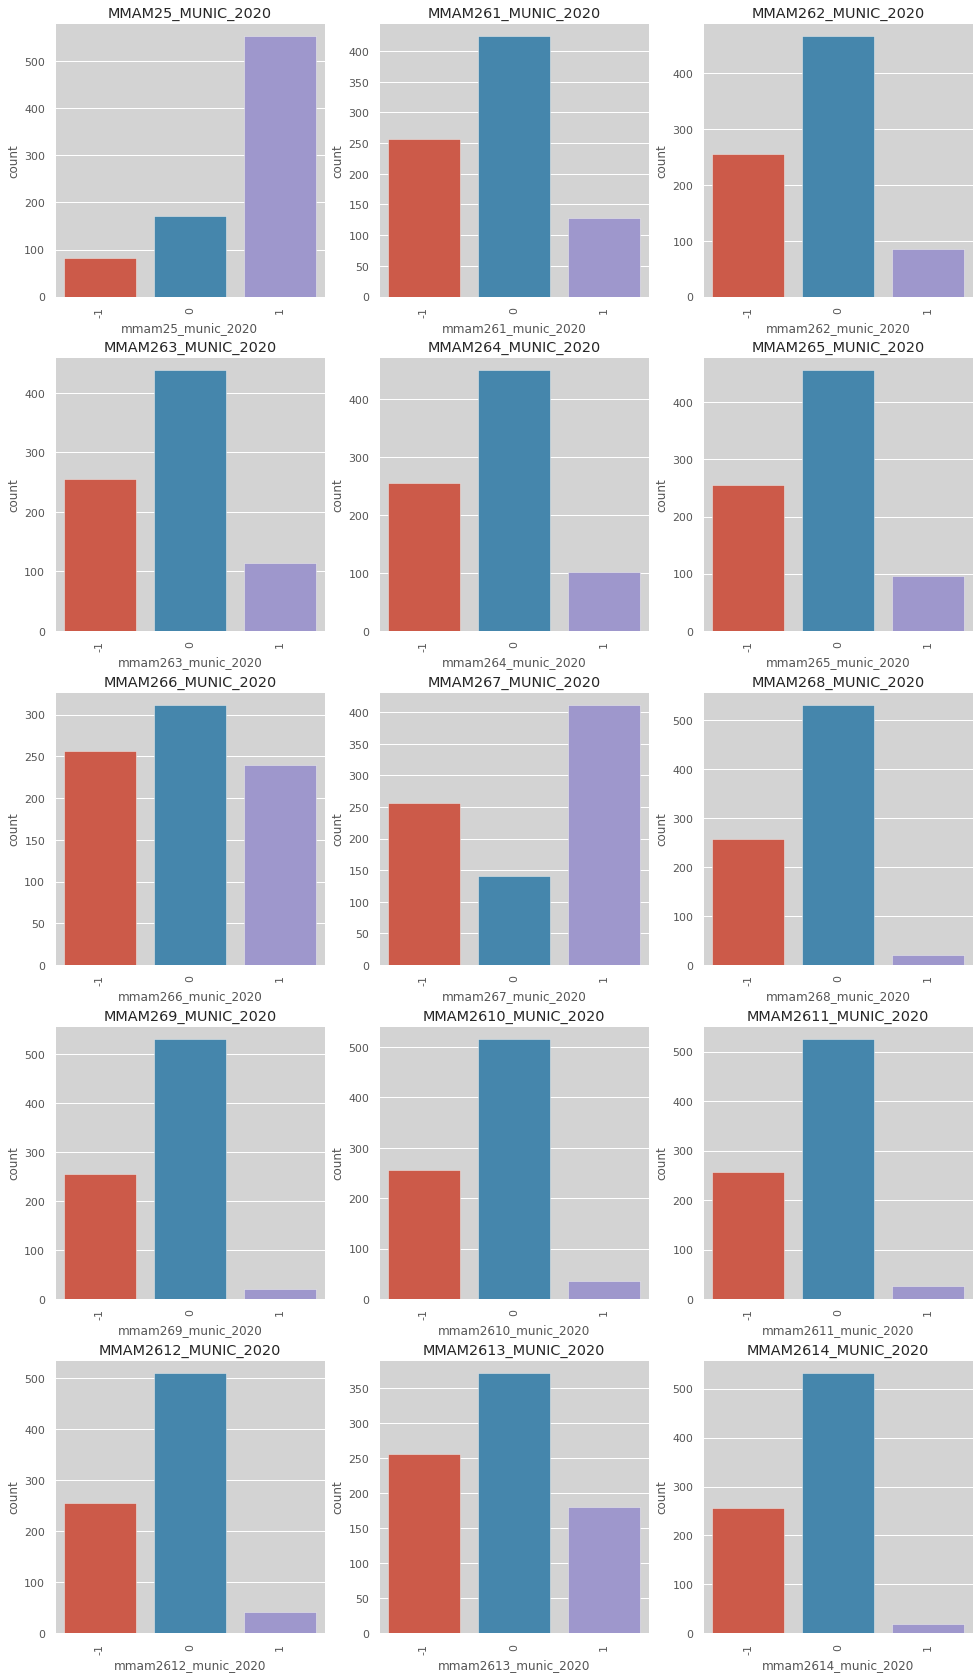

In [73]:
# Once there are lots of numerical features
# we will be able to inspect them only by summary statistics of their distributions
categorical_plot( df_cat )

# remember that most -1 values are to to missing values imputation

## 6.3 - Bivariate Analysis

*Analyze the relationship between specific variables*

In order to answer <i><b>"what regions have the highest social and economic return when recovering or reforesting deforested areas?"</b></i>, we will use the "variation_percent_cobertura_florest_1985-2019" variable as our target and try to understand its distribution and its behaviour in regard to other variables.

Just to remember that:
> <i>variation_percent_cobertura_florest_1985-2019 = (cobertura_florest_2019 - cobertura_florest_1985) / cobertura_florest_1985</i>

This way <i><b>"variation_percent_cobertura_florest_1985"</i></b> will be our <i><u>proxy</u></i> for <i><b>"recovering or reforesting deforested areas"</i></b>

### *Inspect "variation_percent_cobertura_florest_1985" distribution*

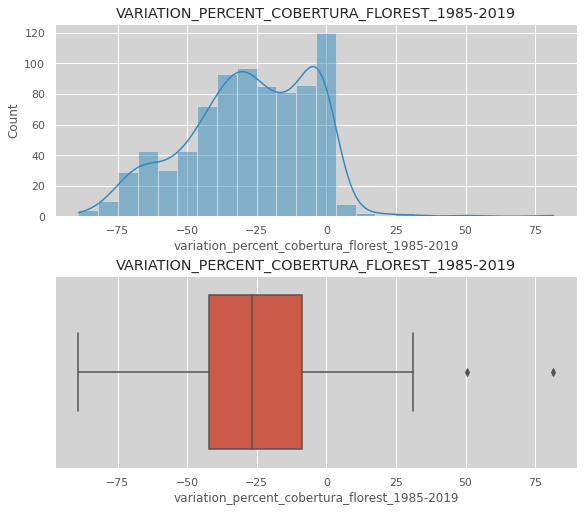

In [74]:
# plot "variation_percent_cobertura_florest_1985-2019" distribution
numerical_plot(dataframe = df_eda, column = "variation_percent_cobertura_florest_1985-2019")

In [75]:
# get basic statistics
summary_statistics(df_eda[["variation_percent_cobertura_florest_1985-2019"]])



Statistics for Numerical Variables


0.053217821782178217


Statistics for Numerical Variables


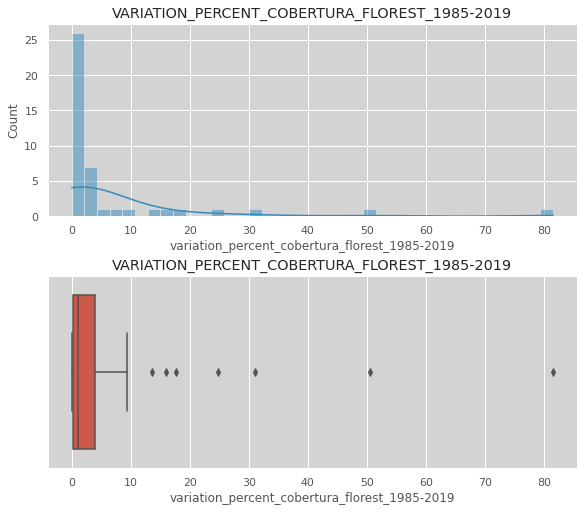

In [76]:
# get data only for municipality whose forest coverage increased
df_ = df_eda[df_eda["variation_percent_cobertura_florest_1985-2019"] > 0]

# get the percentage of municipalities that increased their forest coverage over time
print((df_eda["variation_percent_cobertura_florest_1985-2019"] > 0).mean())

# plot "variation_percent_cobertura_florest_1985-2019" distribution
numerical_plot(dataframe = df_, column = "variation_percent_cobertura_florest_1985-2019")

# get basic statistics
summary_statistics(df_[["variation_percent_cobertura_florest_1985-2019"]])

**CONCLUSIONS**

- Almost 95% of municipalities reduced their forest coverage from 1985 till 2019
- On average, municipalities reduced their forest coverage by 27% (~1/4) from 1985 till 2019
- Almost 5% of municipalities increased their forest coverage from 1985 till 2019
- Taking municipalities that increased their forest coverage, the average increase was about 6% from 1985 till 2019 and around 50% of them increased less than 1%.

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- ppob_pos_admin_2017

*ppob_pos_admin_2017 -> Percentual de vulneráveis à pobreza no Cadastro Único pós Bolsa Família = Participação percentual de pessoas inscritas no Cadastro Único consideradas vulneráveis à pobreza após o recebimento do Bolsa Família no total de pessoas inscritas no Cadastro Único. Considera-se vulnerável à pobreza as pessoa com renda familiar per capita menor ou igual a BRL 255,00 de 01/08/2010 corrigidos através do IPCA. Foram excluídas as pessoas pertencentes a famílias com mais de 2 anos sem atualização do cadastro. A referência deste indicador é o mês de dezembro de cada ano.*

ppob_pos_admin_2017  variation_percent_cobertura_florest_1985-2019
227                 76.7                                          -24.0
754                 73.9                                          -16.3
775                 50.5                                          -51.1

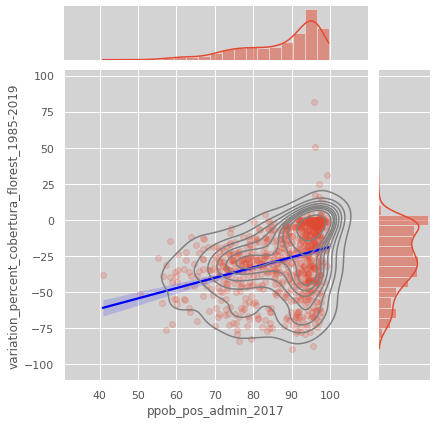

In [77]:
# define columns of interest
x_axis_col = 'ppob_pos_admin_2017'
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

ppob_pos_admin_2017  variation_percent_cobertura_florest_1985-2019  \
417                 96.5                                          -32.2   
616                 96.2                                            0.1   
511                 77.4                                          -11.8   

    discret_ppob_pos_admin_2017  
417         <-quantiles>80-85<>  
616         <-quantiles>80-85<>  
511         <-quantiles>15-20<>

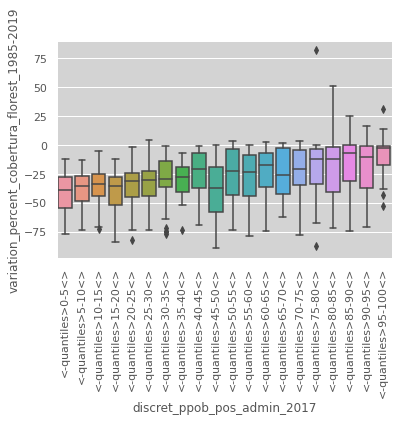

In [78]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [79]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: 0.330  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: 0.394  

  p-value: 0.000  



**CONCLUSIONS**

- A princípio, quanto maior a parcela da população vulnerável a pobreza, menor a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- x3_farming_bioma_cobert_2019

x3_farming_bioma_cobert_2019  \
707                     118,702.7   
251                     109,424.5   
456                       5,889.1   

     variation_percent_cobertura_florest_1985-2019  
707                                          -23.5  
251                                          -35.0  
456                                          -22.8

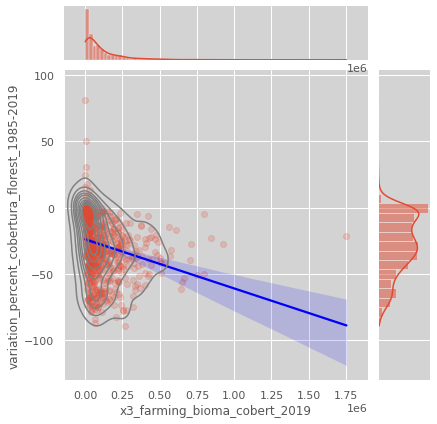

In [80]:
# define columns of interest
x_axis_col = 'x3_farming_bioma_cobert_2019'
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

x3_farming_bioma_cobert_2019  \
81                        2,821.2   
342                      21,930.9   
454                       2,207.1   

     variation_percent_cobertura_florest_1985-2019  \
81                                            -1.3   
342                                          -18.3   
454                                          -35.5   

    discret_x3_farming_bioma_cobert_2019  
81                     <-quantiles>0-5<>  
342                  <-quantiles>25-30<>  
454                    <-quantiles>0-5<>

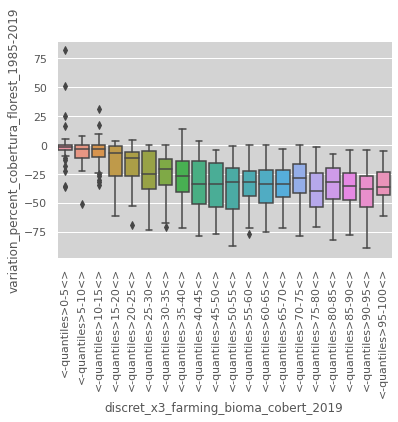

In [81]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [82]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: -0.241  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: -0.488  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto maior a área do municipio destinada a fazendas, maior a diminuição da cobertura floresta.
- Faz um certo sentido pois para haver maiores áreas pras fazendas deveria haver menores áreas pras florestas (entre outras áreas) haja vista que a área do município (teoricamente) é constante no tempo.

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- e_anosestudo_censo_2010

*e_anosestudo_censo_2010 -> Expectativa de anos de estudo aos 18 anos de idade = Número médio de anos de estudo que uma geração de crianças que ingressa na escola deverá completar ao atingir 18 anos de idade, se os padrões atuais se mantiverem ao longo de sua vida escolar.*

e_anosestudo_censo_2010  variation_percent_cobertura_florest_1985-2019
210                      8.8                                          -14.9
99                       8.2                                          -17.6
207                     10.7                                          -24.1

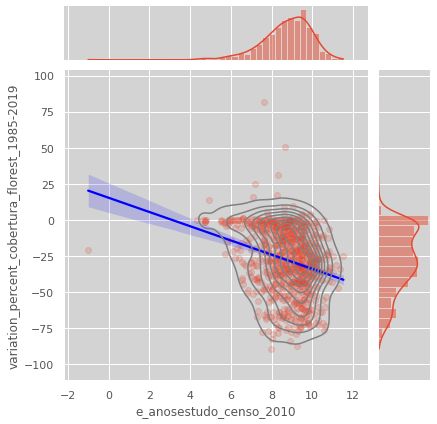

In [83]:
# define columns of interest
x_axis_col = 'e_anosestudo_censo_2010'
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

e_anosestudo_censo_2010  variation_percent_cobertura_florest_1985-2019  \
722                      7.6                                          -13.1   
273                     10.0                                          -50.7   
226                      9.7                                          -17.1   

    discret_e_anosestudo_censo_2010  
722             <-quantiles>10-15<>  
273             <-quantiles>85-90<>  
226             <-quantiles>75-80<>

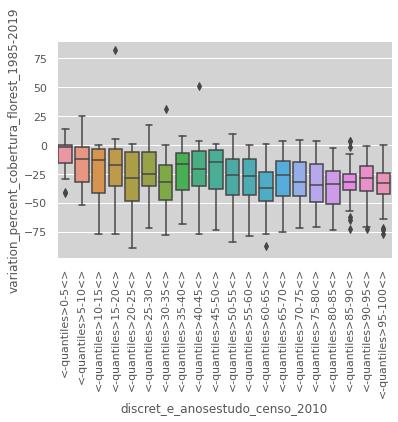

In [84]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [85]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: -0.267  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: -0.270  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto maior a expectativa de anos de ensino, maior a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- gini_censo_2010

*gini_censo_2010 -> Índice de Gini = Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor varia de 0, quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor), a 1, quando a desigualdade é máxima (apenas um indivíduo detém toda a renda).O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.*

gini_censo_2010  variation_percent_cobertura_florest_1985-2019
30               0.6                                           -4.0
403              0.5                                          -66.4
501              0.5                                          -18.6

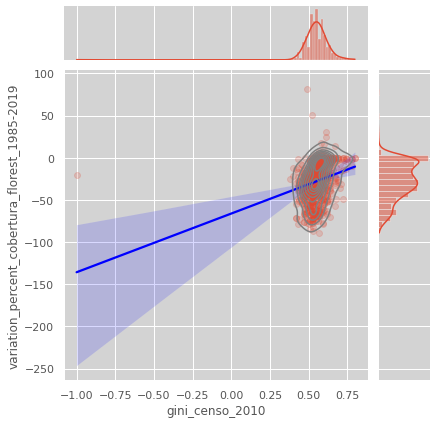

In [86]:
# define columns of interest
x_axis_col = 'gini_censo_2010'
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Statistical test to check (in)dependency between variables*

In [87]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: 0.260  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: 0.403  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto menor o Gini (menos desigualdade), maior a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs -------  r2040_censo_2010

*r2040_censo_2010 -> Razão 20% mais ricos / 40% mais pobres = Medida do grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Compara a renda per capita média dos indivíduos pertencentes ao quinto mais rico dessa distribuição com a renda per capita média dos indivíduos pertencentes aos dois quintos mais pobres. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.*

r2040_censo_2010  variation_percent_cobertura_florest_1985-2019
231              16.2                                          -38.3
385              22.0                                           -0.1
339              49.3                                           13.7

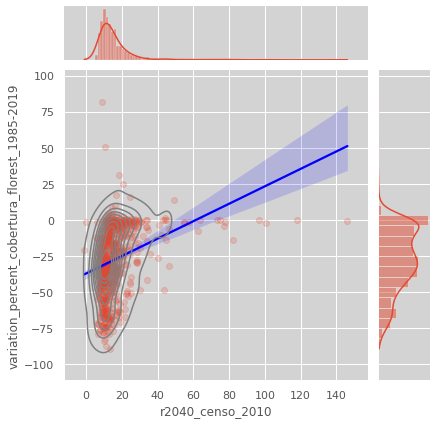

In [88]:
# define columns of interest
x_axis_col = 'r2040_censo_2010'
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

r2040_censo_2010  variation_percent_cobertura_florest_1985-2019  \
438              19.3                                           -1.6   
393              14.3                                          -36.0   
416              21.0                                          -24.7   

    discret_r2040_censo_2010  
438      <-quantiles>80-85<>  
393      <-quantiles>60-65<>  
416      <-quantiles>85-90<>

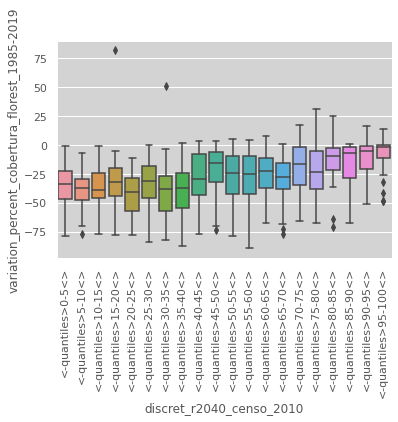

In [89]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [90]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: 0.312  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: 0.426  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto menor a diferença entre os mais ricos e os mais pobres, maior a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- rdpc_censo_2010

*rdpc_censo_2010 -> Renda per capita média = Razão entre o somatório da renda de todos os indivíduos residentes em domicílios particulares permanentes e o número total desses indivíduos. Valores em reais de 01/agosto de 2010.*

rdpc_censo_2010  variation_percent_cobertura_florest_1985-2019
216            234.2                                          -24.7
262            245.1                                          -63.4
38             336.9                                          -37.3

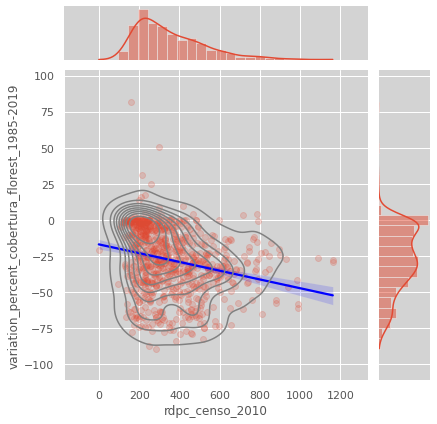

In [91]:
# define columns of interest
x_axis_col = "rdpc_censo_2010"
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

rdpc_censo_2010  variation_percent_cobertura_florest_1985-2019  \
672            360.1                                          -28.6   
745             -1.0                                          -20.7   
472            264.8                                          -21.8   

    discret_rdpc_censo_2010  
672     <-quantiles>60-65<>  
745       <-quantiles>0-5<>  
472     <-quantiles>35-40<>

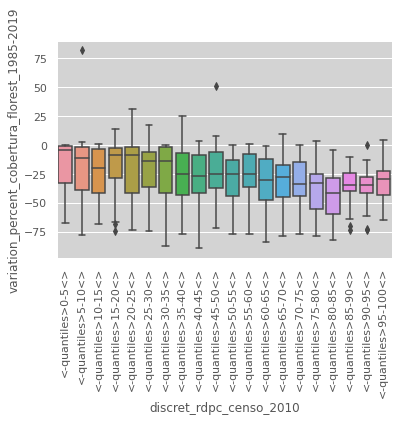

In [92]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [93]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: -0.240  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: -0.305  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto maior a renda per capita, maior a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- t_agua_censo_2010

*t_agua_censo_2010 -> Percentual da população que vive em domicílios com água encanada = Razão entre a população que vive em domicílios particulares permanentes com água canalizada para um ou mais cômodos e a população total residente em domicílios particulares permanentes multiplicado por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa.*

t_agua_censo_2010  variation_percent_cobertura_florest_1985-2019
781               79.0                                          -26.0
465               91.4                                          -67.2
676               96.1                                          -21.7

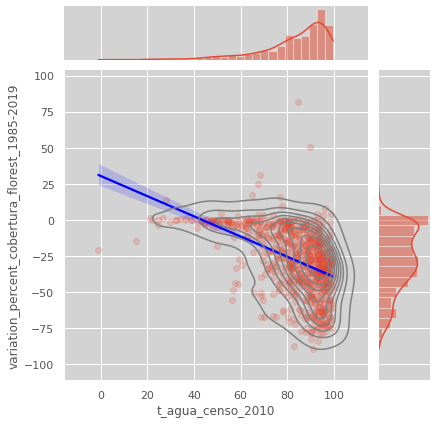

In [94]:
# define columns of interest
x_axis_col = "t_agua_censo_2010"
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

t_agua_censo_2010  variation_percent_cobertura_florest_1985-2019  \
744               81.9                                          -30.1   
177               90.2                                          -30.5   
605               47.5                                           -0.8   

    discret_t_agua_censo_2010  
744       <-quantiles>35-40<>  
177       <-quantiles>55-60<>  
605         <-quantiles>0-5<>

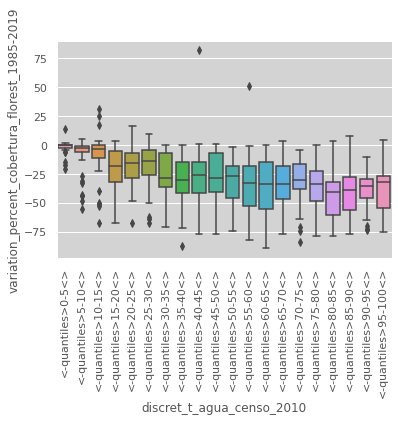

In [95]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [96]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: -0.471  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: -0.503  

  p-value: 0.000  



**CONCLUSIONS**

- Quanto melhor a acesso a rede de água encanada, maior a redução na cobertura florestal. Mas lembrar que **isso é uma correlação e não uma relação de causa e efeito!** 
- Uma *possível* interpretação para isso é que as áreas mais "desenvolvidas" em termos econômicos e sociais tenderiam a ser áreas com mais desmatamento (e menor cobertura ambiental) como uma própria consequência das políticas adotadas para atingir esse maior desenvolvimento econômico e social (no Brasil, basicamente explorando recursos naturais existentes).

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- area_per_num_imoveis_rurais_2017_rate

*area_per_num_imoveis_rurais_2017_rate = area_imoveis_rurais_hectar_2021 / num_imoveis_rurais_2021*

area_per_num_imoveis_rurais_2017_rate  \
803                                  471.7   
368                                  225.5   
222                                   81.2   

     variation_percent_cobertura_florest_1985-2019  
803                                          -49.4  
368                                          -49.7  
222                                          -24.9

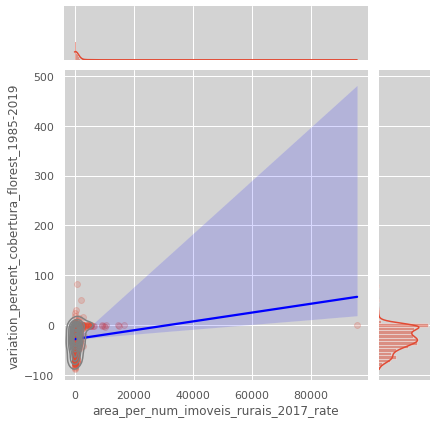

In [97]:
# define columns of interest
x_axis_col = "area_per_num_imoveis_rurais_2017_rate"
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

area_per_num_imoveis_rurais_2017_rate  \
552                                  390.6   
458                                  273.0   
8                                    194.6   

     variation_percent_cobertura_florest_1985-2019  \
552                                           -3.2   
458                                          -49.3   
8                                            -25.5   

    discret_area_per_num_imoveis_rurais_2017_rate  
552                           <-quantiles>60-65<>  
458                           <-quantiles>50-55<>  
8                             <-quantiles>35-40<>

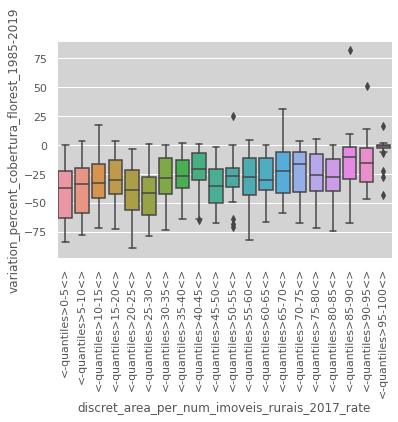

In [98]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [99]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: 0.145  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: 0.330  

  p-value: 0.000  



### variation_percent_cobertura_florest_1985-2019 ------- vs ------- percent_cobertura_farming_2019

*percent_cobertura_farming_2019 = x3_farming_bioma_cobert_2019 / suma_todas_coberturas*

percent_cobertura_farming_2019  \
489                             0.4   
795                             0.5   
113                             0.8   

     variation_percent_cobertura_florest_1985-2019  
489                                          -30.4  
795                                          -48.7  
113                                          -82.3

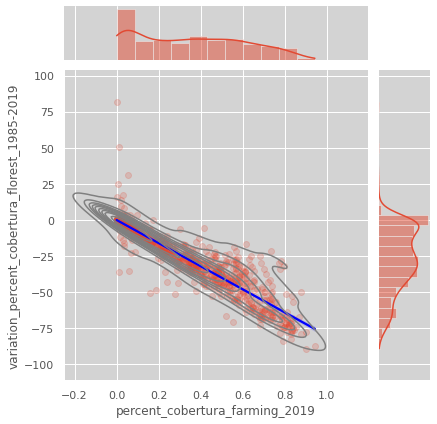

In [100]:
# define columns of interest
x_axis_col = "percent_cobertura_farming_2019"
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# plot a joint chart
g = sns.jointplot(data = df_, 
              x = x_axis_col, 
              y = y_axis_col, 
              kind = 'reg', 
              joint_kws = {'line_kws': {'color':'blue'},
                           'scatter_kws': dict( alpha = 0.2 )
                          }
             );
# add a kde layer
sns.kdeplot(y = y_axis_col, x = x_axis_col, data = df_, color = "gray", ax = g.ax_joint);

*Analysing x variable in a discretized way*

percent_cobertura_farming_2019  \
296                             0.0   
571                             0.0   
494                             0.3   

     variation_percent_cobertura_florest_1985-2019  \
296                                          -36.3   
571                                           -0.4   
494                                          -35.0   

    discret_percent_cobertura_farming_2019  
296                     <-quantiles>5-10<>  
571                      <-quantiles>0-5<>  
494                    <-quantiles>40-45<>

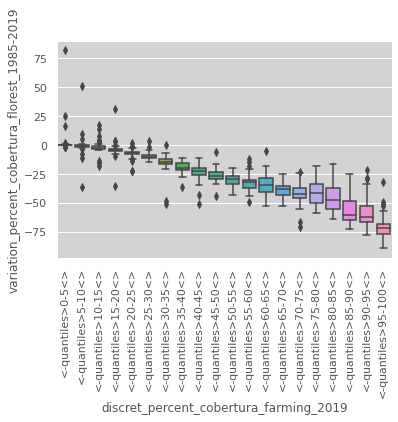

In [101]:
# discretize "area_per_num_imoveis_rurais_2017_rate" into bins regarding percentile values
df_[f"discret_{x_axis_col}"] = discretize_into_quantile_labales( df_[x_axis_col], num_bins = 20, bin_label_add = '')

# inpect dataframe
display(df_.sample(3))

# plot a box chart based on created quantiles
sns.boxplot(data = df_, 
            x = f"discret_{x_axis_col}", 
            y = y_axis_col)
plt.xticks( rotation = 90 );

*Statistical test to check (in)dependency between variables*

In [102]:
################################
####### CORRELATION TEST #######
################################

# define variables 
array_one = df_[x_axis_col].to_numpy()
array_two = df_[y_axis_col].to_numpy()

# do correlation tests
correlation_tests( array_one, array_two );

	  PEARSON CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Calculated p-value assumes that each dataset is normally distributed.  

  Pearson correlation coef: -0.916  

  p-value: 0.000  

	  SPEARMAN CORRELATION TEST  


  NULL HYPOTHESIS: two sets of data are uncorrelated.  

  Nonparametric test. It does NOT assume that both datasets are normally distributed.  

  Spearman correlation coef: -0.934  

  p-value: 0.000  



**CONCLUSIONS**
- Quanto maior a área percentual do municipio destinada a fazendas, maior a diminuição da cobertura floresta.
- Faz um certo sentido pois para haver maiores áreas pras fazendas deveria haver menores áreas pras florestas (entre outras áreas) haja vista que a área do município (teoricamente) é constante no tempo.

### variation_percent_cobertura_florest_1985-2019 ------- vs ------- num_extreme_cond_2020

*num_extreme_cond_2020 é o número de ocorrências de condições climáticas extremas em 2020*

num_extreme_cond_2020  variation_percent_cobertura_florest_1985-2019
769                      3                                          -11.9
96                       3                                          -20.9
717                      3                                          -39.8

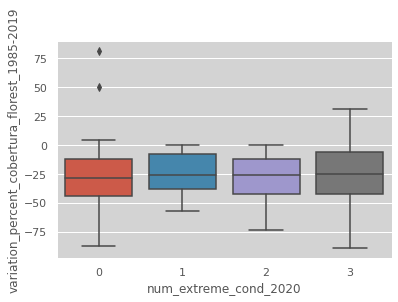

In [103]:
# define columns of interest
x_axis_col = "num_extreme_cond_2020"
y_axis_col = "variation_percent_cobertura_florest_1985-2019"

# make a copy of relevant features for the analysis
df_ = df_eda[ [x_axis_col, y_axis_col] ].copy()

# inpect dataframe
display(df_.sample(3))

# boxplot
sns.boxplot(data = df_, 
            x = x_axis_col, 
            y = y_axis_col);

**CONCLUSIONS**

- A princípio, não há relação clara entre o número de eventos climáticos extremos no ano de 2020 e a redução na cobertura florestal de 1985 a 2019. Mas lembrar que **isso é apenas uma ausência de correlação!** 
- Uma *possível* interpretação para isso é condições climáticas extremas tendem a afetar mais de um município já que se originam de fenomenos da natureza (que não se restriguem às limitações territoriais dos municipios). Assim, casa haja dois municípios vizinho, um que perdeu toda sua cobertura florestal e outro que preservou toda sua cobertura vegetal, ambos tenderiam a ter o mesmo número de eventos climáticos extremos ainda que tenham variações na cobertura vegetal tão diferentes. De uma certa forma isso *poderia* causar um "amortecimento" num possível correlação entre redução da cobertura vegetal e número de condições climáticas extremas.

### *Inspect coverage change over time*

In [104]:
# make a copy of the dataframe of interest
df_ = df_cobertura_state_timeline.copy()
 

# iterate over columns
for col in ['sum_farming_area', 'sum_forest_area', 'sum_total_water', 
            'sum_non_vegetated', 'sum_natural_non_forest']:
    # create a percentual column for the given column
    df_[f"{col}_percent"] = df_[ col ] / df_["sum_total_area"]    
      
# create new columns to inspect
df_["farming_forest_area_rate"] = df_["sum_farming_area"] / df_["sum_forest_area"]
df_["farming_water_rate"] = df_["sum_farming_area"] / df_["sum_total_water"]
df_["farming_non_vegetated_rate"] = df_["sum_farming_area"] / df_["sum_non_vegetated"]
df_["farming_natural_non_forest_rate"] = df_["sum_farming_area"] / df_["sum_natural_non_forest"]
df_["forest_water_rate"] = df_["sum_forest_area"] / df_["sum_total_water"]
df_["forest_non_vegetated_rate"] = df_["sum_forest_area"] / df_["sum_non_vegetated"]
df_["forest_natural_non_forest_rate"] = df_["sum_forest_area"] / df_["sum_natural_non_forest"]

# change state column to "Lega Amazon" state or remaining state
df_["state_binary"] = df_["state"].apply( lambda x: "Legal Amazon" if x in LEGAL_AMAZON_STATES else "Remaining")

# check operation
display(df_.sample(3))

state  year  sum_farming_area  sum_forest_area  sum_total_area  \
386    ms  1986      16,037,199.6     12,847,472.9    35,709,745.1   
569    pi  1994       2,160,315.4     21,350,697.2    25,160,818.5   
893    sp  2003      17,741,834.7      5,642,084.4    24,819,595.3   

     sum_total_water  sum_non_vegetated  sum_natural_non_forest  \
386        397,066.7           44,129.1             6,383,561.7   
569         60,856.6          125,593.2             1,461,616.2   
893        573,505.0          645,939.5               216,153.3   

     sum_farming_area_percent  sum_forest_area_percent  ...  \
386                       0.4                      0.4  ...   
569                       0.1                      0.8  ...   
893                       0.7                      0.2  ...   

     sum_non_vegetated_percent  sum_natural_non_forest_percent  \
386                        0.0                             0.2   
569                        0.0                             0.1   
893                        0.0                             0.0   

     farming_forest_area_rate  farming_water_rate  farming_non_vegetated_rate  \
386                       1.2                40.4                       363.4   
569                       0.1                35.5                        17.2   
893                       3.1                30.9                        27.5   

     farming_natural_non_forest_rate  forest_water_rate  \
386                              2.5               32.4   
569                              1.5              350.8   
893                             82.1                9.8   

     forest_non_vegetated_rate  forest_natural_non_forest_rate  state_binary  
386                      291.1                             2.0     Remaining  
569                      170.0                            14.6     Remaining  
893                        8.7                            26.1     Remaining  

[3 rows x 21 columns]

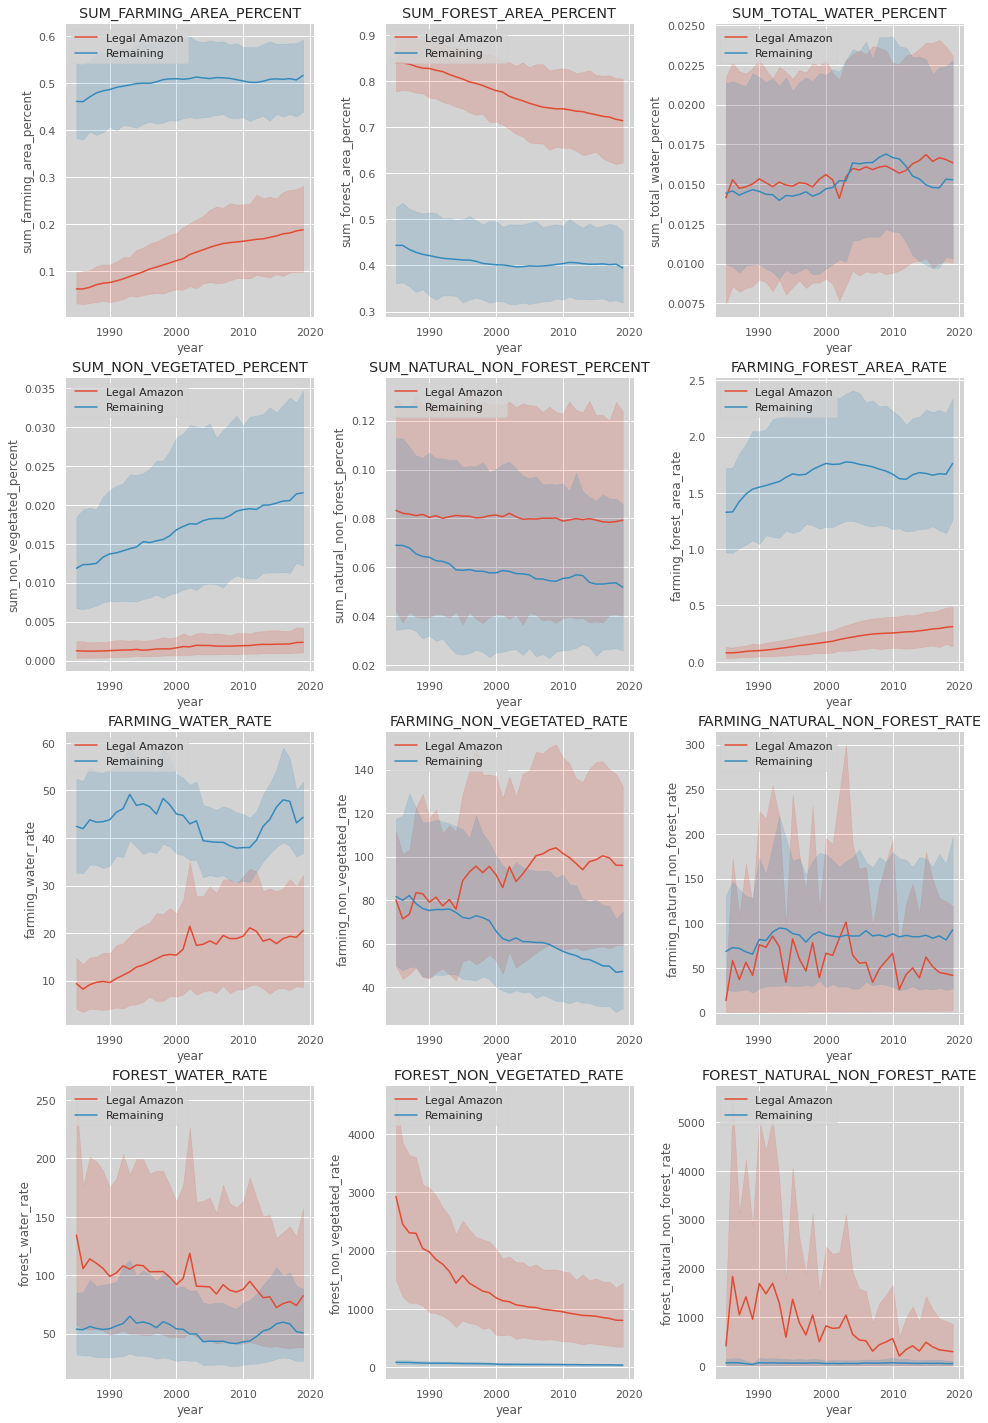

In [105]:
####################
####### PLOT #######

# define number of cols
n_cols = 3
# define number of rows
n_rows = df_.shape[1] // n_cols + 1

# assign figsize
figsize = (n_cols*4.5, n_rows*4.5)

# create a figure object
fig = plt.figure( figsize = figsize, constrained_layout = True )

# create grid for plotting
specs = gridspec.GridSpec( ncols = n_cols, nrows = n_rows, figure = fig)

# iterate over column to plot countplot figure
for index, column in enumerate( df_.columns[8:-1] ): 
    # create a subplot to plot the given feature
    ax1 = fig.add_subplot( specs[index // n_cols, index % n_cols] )
    # set the title for the subplot
    ax1.set_title( column.upper() )
    # do a lineplot per state
    sns.lineplot(data = df_, x = "year", y = column, hue = "state_binary" )
    # set legend
    ax1.legend(loc = 'upper left')

*Further inspect most relevant plots*

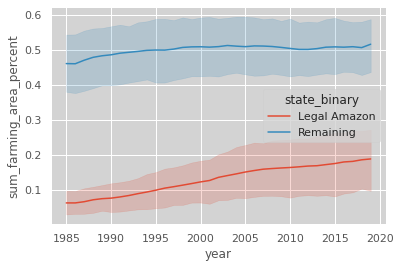

In [106]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "sum_farming_area_percent", hue = "state_binary");

Em relação aos restante do país, os estados da Amazônia Legal tem uma menor porcentagem do seu território sendo destinadas a fazendas 

Isso *possivelmente* ocorre pelo fato de, na Amazônia Legal, a porporção de cobertura florestal é muito maior que no restante do país. Assim, métricas que usam a cobertura florestal da Amazônia Legal tendem a ficar "distorcidas". 

Porém, ao longo dos anos, **a taxa de aumento dessa proporção de território destinado a fazendas é bem maior na Amazônia Legal que o restante do país.**

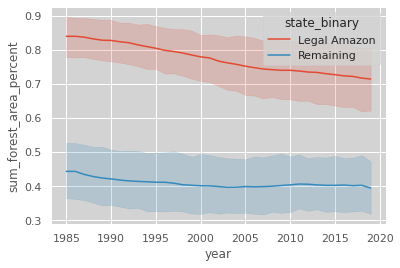

In [107]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "sum_forest_area_percent", hue = "state_binary");

Em relação aos restante do país, os estados da Amazônia Legal tem uma maior porcentagem do seu território sendo coberto por florestas. 

Porém, ao longo dos anos, **a taxa de diminuição da cobertura de florestas dos estados na Amazônia Legal é bem maior que o restante do país.**

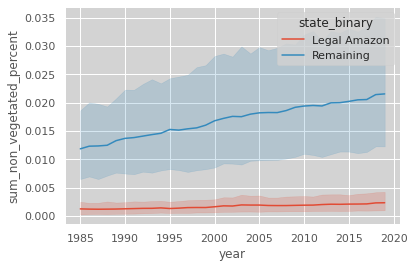

In [108]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "sum_non_vegetated_percent", hue = "state_binary");

Em relação aos restante do país, os estados da Amazônia Legal tem uma menor porcentagem do seu território que não é coberto por vegetação.

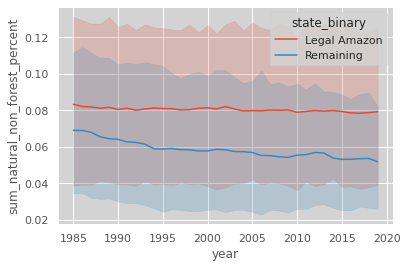

In [109]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "sum_natural_non_forest_percent", hue = "state_binary");

Em relação ao restante do país, os estados da Amazônia Legal tem uma maior porcentagem do seu território que naturalmente não é coberto por florestas.

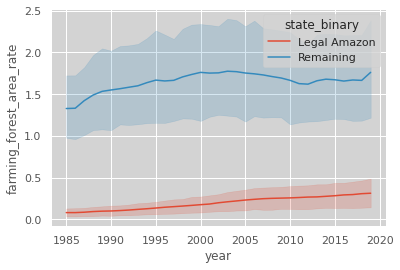

In [110]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "farming_forest_area_rate", hue = "state_binary");

Em relação ao restante do país, os estados da Amazônia Legal tem uma menor taxa de extensão de área de fazenda por área de floresta que o restante do país. Isso quer dizer que, pra cada hectar de floresta, há menos hectares de fazenda na Amazônia Legal que no resto do país. 

Isso *possivelmente* ocorre pelo fato de, na Amazônia Legal, a porporção de cobertura florestal é muito maior que no restante do país. Assim, métricas que usam a cobertura florestal da Amazônia Legal tendem a ficar "distorcidas". 

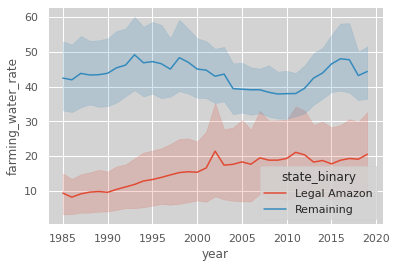

In [111]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "farming_water_rate", hue = "state_binary");

Os estados da Amazônia Legal tem uma menor taxa de extensão de área de fazenda por área coberta por água que o restante do país.
Isso quer dizer que, pra cada hectar coberto por água, há menos hectares de fazenda na Amazônia Legal que no resto do país. 

Isso *possivelmente* ocorre pelo fato de, na Amazônia Legal, há muito mais rios e há muito mais grandes rios que no restante do país. Assim, métricas que usam a área cobertura por água da Amazônia Legal tendem a ficar "distorcidas".

Porém essa diferença entre a Amazônia Legal e o restante do país vêm diminuindo ao longo dos anos.

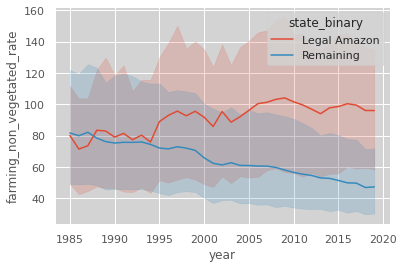

In [112]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "farming_non_vegetated_rate", hue = "state_binary");

Em relação ao restante do país, os estados da Amazônia Legal tem uma maior taxa de extensão de área de fazenda por área não coberta de vegetação que o restante do país.
**Isso quer dizer que, pra cada hectar não coberto por vegetação, há mais hectares de fazenda na Amazônia Legal que no resto do país.**

Até meados da década de 90, a Amazônia Legal tinha esse percentual próximo dos outros estados, porém essa diferença vem se acentuando ao longo dos anos.

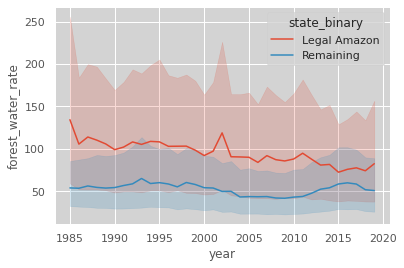

In [113]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "forest_water_rate", hue = "state_binary");

Os estados da Amazônia Legal tem uma maior taxa de extensão de área de coberta por florestas por área coberta por água que o restante do país. Isso quer dizer que, pra cada hectar coberto por água, há mais hectares de florestas na Amazônia Legal que no resto do país. 

Porém essa proporção vem diminuindo nos estados da Amazônia Legal enquanto que se mantém relativamente estável no restante do país.

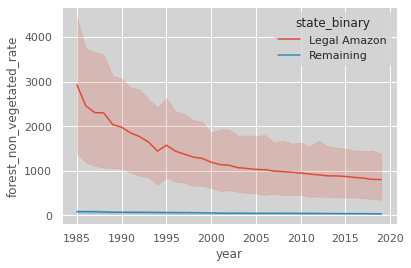

In [114]:
# do a lineplot per state
sns.lineplot(data = df_, x = "year", y = "forest_non_vegetated_rate", hue = "state_binary");

Em relação ao restante do país, os estados da Amazônia Legal tem uma maior taxa de extensão de área de coberta por florestas por área não coberta por vegetação que o restante do país.
Isso quer dizer que, pra cada hectar não coberto por vegetação, há mais hectares de florestas na Amazônia Legal que no resto do país. 

Porém **essa proporção vem diminuindo rapidamente nos estados da Amazônia Legal** enquanto que se mantém relativamente estável no restante do país.

## 6.4 - Multivariate Analysis

*Analyse multiple relationship between variables*

### 6.4.1 - Numerical Features

*Inspect the correlation between numerical features*

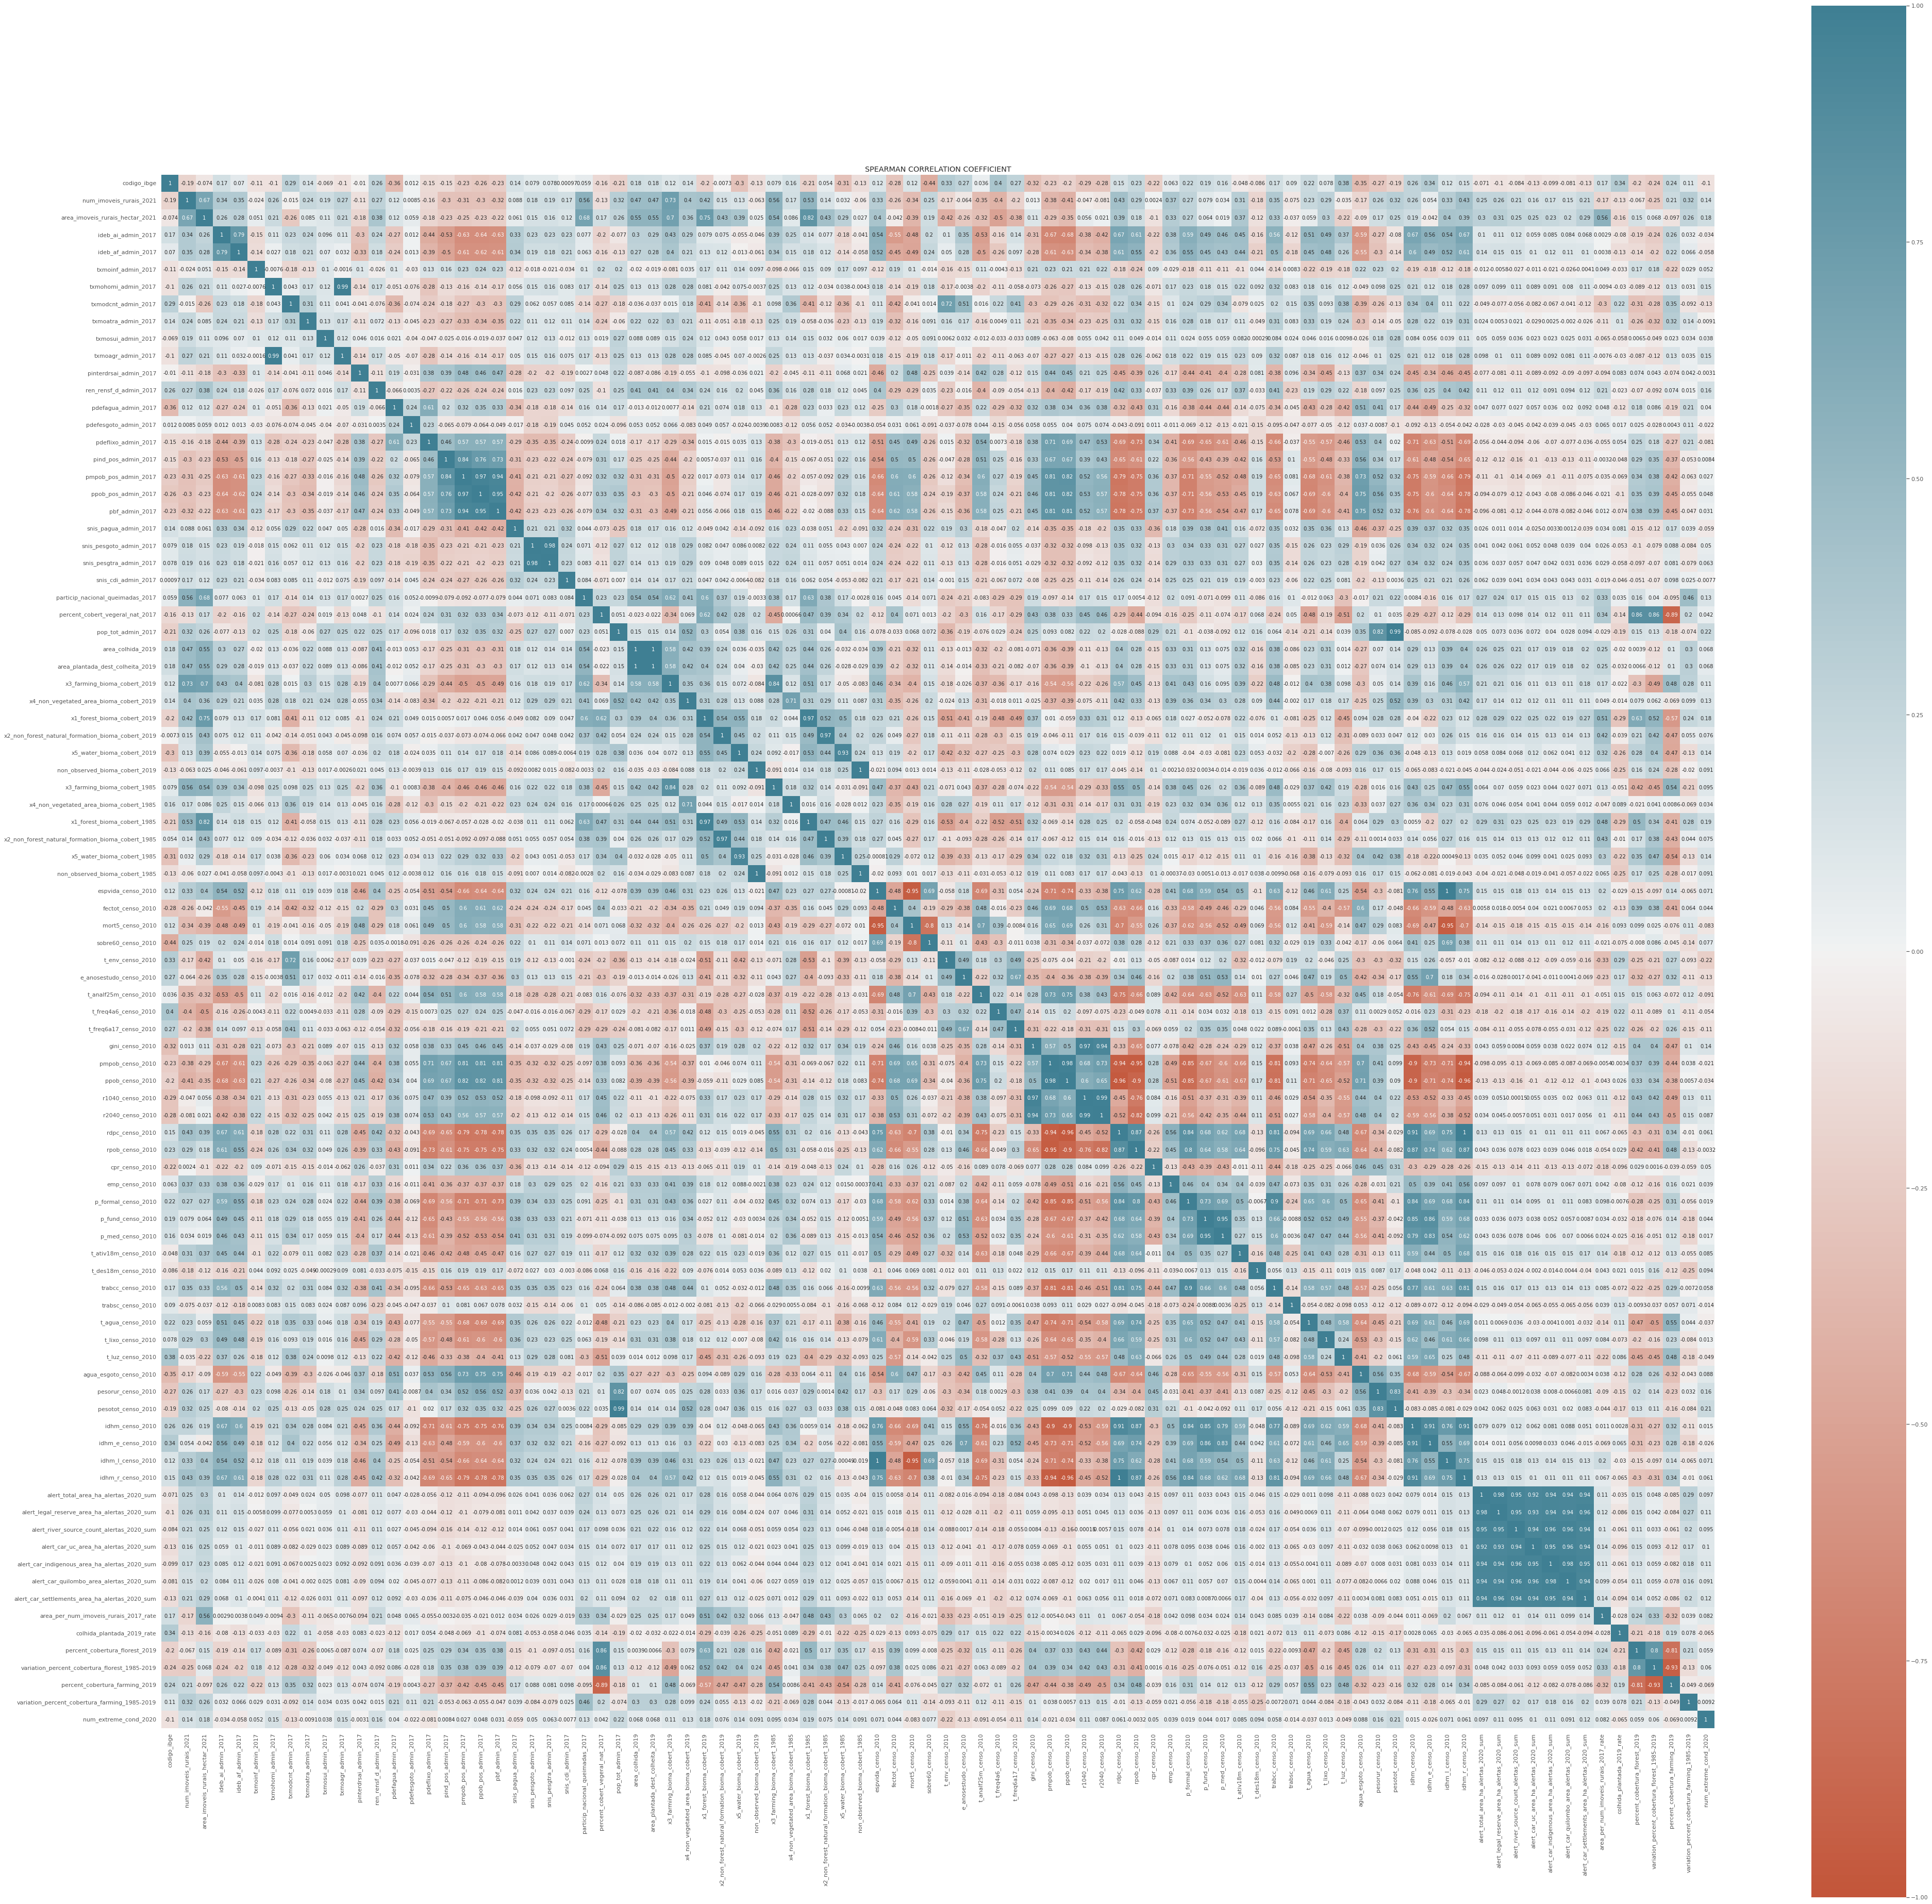

In [115]:
# plot spearman correlation matrix
plot_spearman_heatmap( df_num, saving_path = "../../img/num_spearman_heatmap.png" );

### 6.4.2 - Categorical Features

*Inspect the correlation between categorical features*

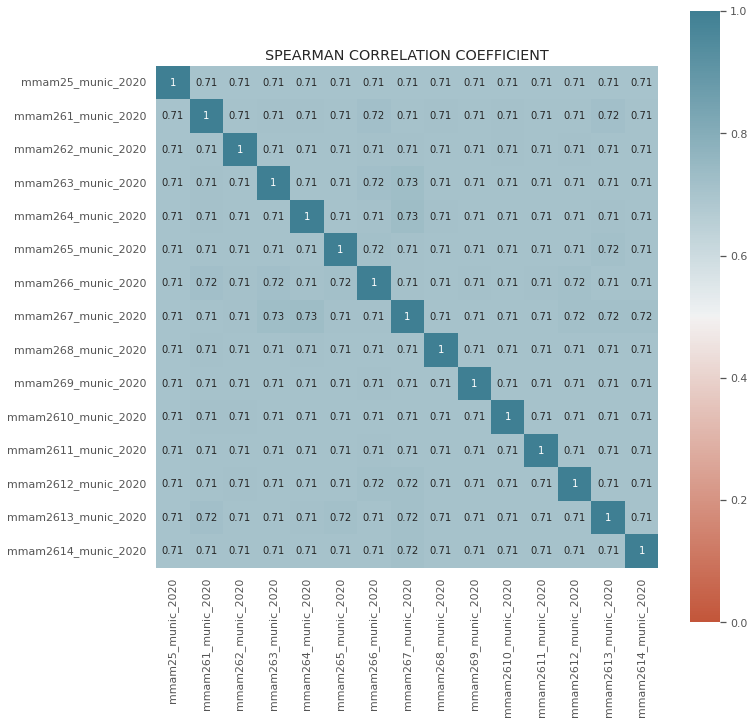

In [116]:
# plot cramer-v correlation matrix
plot_cramer_v_heatmap( df_cat, saving_path = "../../img/cat_cramer_v_heatmap.png" );